# Machine Learning II: Introduction to Supervised Classification Methods

## intro image

![image](https://miro.medium.com/v2/resize:fit:1400/1*GxoJmn7FPspmr1Gd-sDDyg.png)

## Supervised Learning Concepts: Nearest Neighbors

Nearest neighbors is a member of the instance based learning and lazy Learning families. Instance based models base the model on the evaluation of a function that depends on the point we are querying and training data. Nearest Neighbors is the **simplest** of these techniques. The rationale behind this model is as follows: Each training data set can be seen as a solved case/problem. Thus, given a new problem instance we may retrieve the most *similar* case in our data set and apply the same solution. In the case of classification, this means that we select the label of the most similar data example in our training set.

### Intro

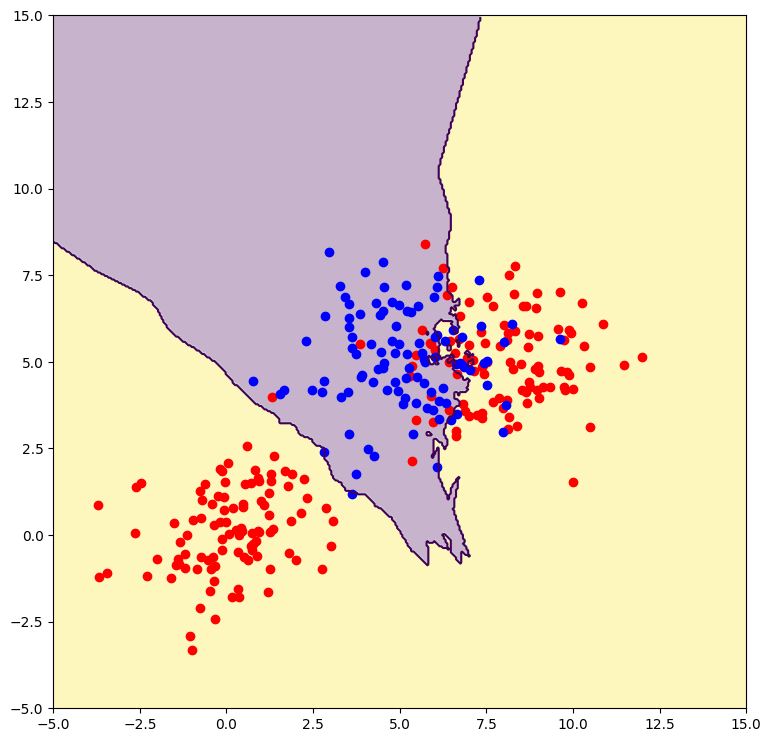

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Let's see what the boundary looks like in a toy problem.

MAXN=100
X = np.concatenate([1.25*np.random.randn(MAXN,2),5+1.5*np.random.randn(MAXN,2)]) 
X = np.concatenate([X,[8,5]+1.5*np.random.randn(MAXN,2)])
y = np.concatenate([np.ones((MAXN,1)),-np.ones((MAXN,1))])
y = np.concatenate([y,np.ones((MAXN,1))])
idxplus = y==1
idxminus = y==-1
plt.scatter(X[idxplus.ravel(),0],X[idxplus.ravel(),1],color='r')
plt.scatter(X[idxminus.ravel(),0],X[idxminus.ravel(),1],color='b')

from sklearn import neighbors
from sklearn import metrics

delta = 0.05
xx = np.arange(-5.0, 15.0, delta)
yy = np.arange(-5.0, 15.0, delta)
XX, YY = np.meshgrid(xx, yy)
Xf = XX.flatten()
Yf = YY.flatten()
sz=XX.shape
data = np.c_[Xf[:,np.newaxis],Yf[:,np.newaxis]];

#Evaluate the model for a given weight
clf = neighbors.KNeighborsClassifier(11)
clf.fit(X,y.ravel())
Z=clf.predict(data)
Z.shape=sz

plt.imshow(Z, interpolation='bilinear', origin='lower', extent=(-5,15,-5,15),alpha=0.3, vmin=-1, vmax=1)
plt.contour(XX,YY,Z,[0])
fig = plt.gcf()
fig.set_size_inches(9,9)

Observations:

+ The boundary is piece-wise linear. It is composed of edges of the Voronoi diagram.
+ Observe that the classifier perfectly fits the training data. Adding or removing one data point can largely change the boundary. This implies that the complexity of the method is large.
+ The key component of the nearest neigbors classifier is the notion of similarity/distance.

Remember that regularization explicitly models complexity. Regularization is usually a penalty term. In nearest neighbors we can penalize solutions with small "support" by using a majority voting on the $k$ closests data samples to the query sample.

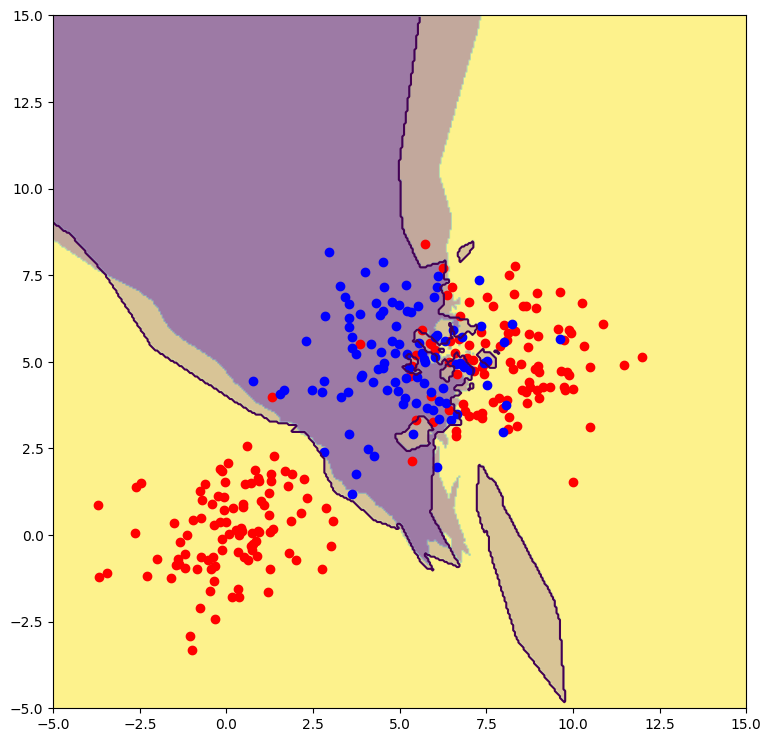

In [2]:
#Let's see what the boundary looks like in a toy problem.

plt.scatter(X[idxplus.ravel(),0],X[idxplus.ravel(),1],color='r')
plt.scatter(X[idxminus.ravel(),0],X[idxminus.ravel(),1],color='b')

clf = neighbors.KNeighborsClassifier(3)
clf.fit(X,y.ravel())
Z2=clf.predict(data)
Z2.shape=sz

plt.imshow(Z, interpolation='bilinear', origin='lower', extent=(-5,15,-5,15),alpha=0.4, vmin=-1, vmax=1)
plt.imshow(Z2, interpolation='bilinear', origin='lower', extent=(-5,15,-5,15),alpha=0.2, vmin=-1, vmax=1)

plt.contour(XX,YY,Z2,[0])
fig = plt.gcf()
fig.set_size_inches(9,9)

### Confusion Matrix (churn classification with nearest neighbor)

Lets analyse a problem of customer churn prediction. We may fit a 1-Nearest Neighbor classifier and check the result.

In [3]:
## Prepare the data
churn_df = pd.read_csv('churn.csv')
col_names = churn_df.columns.tolist()

# Isolate target data
churn_result = churn_df['Churn?']
y = np.where(churn_result == 'True.',1,0)

# We don't need these columns
to_drop = ['State','Phone','Churn?']
churn_feat_space = churn_df.drop(to_drop,axis=1) #X

# 'yes'/'no' has to be converted to boolean values
# NumPy converts these from boolean to 1. and 0. later
yes_no_cols = ["Int'l Plan","VMail Plan"]
churn_feat_space[yes_no_cols] = churn_feat_space[yes_no_cols] == 'yes'

# Pull out features for future use
features = churn_feat_space.columns

X = churn_feat_space.values.astype(float)

print ("Feature space holds %d observations and %d features" % X.shape)
print ("Unique target labels:", np.unique(y))


Feature space holds 3333 observations and 18 features
Unique target labels: [0 1]


In [4]:
from sklearn import model_selection
from sklearn import neighbors
from sklearn import metrics
acc = np.zeros((5,))
i=0
kf=model_selection.KFold(n_splits=5)
kf.get_n_splits()
#We will build the predicted y from the partial predictions on the test of each of the folds
yhat = y.copy()
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    dt = neighbors.KNeighborsClassifier(n_neighbors=1)
    dt.fit(X_train,y_train)
    yhat[test_index] = dt.predict(X_test)
    acc[i] = metrics.accuracy_score(yhat[test_index], y_test)
    i=i+1
print ('Mean accuracy: '+ str(np.mean(acc)))
X_train[0,:]

Mean accuracy: 0.8106784445615031


array([128.  , 415.  ,   0.  ,   1.  ,  25.  , 265.1 , 110.  ,  45.07,
       197.4 ,  99.  ,  16.78, 244.7 ,  91.  ,  11.01,  10.  ,   3.  ,
         2.7 ,   1.  ])

/var/folders/sb/bdh1wr117yqfkv_bvrcwfxp80000gn/T/ipykernel_10022/3338893031.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([''] + labels, size=20)
/var/folders/sb/bdh1wr117yqfkv_bvrcwfxp80000gn/T/ipykernel_10022/3338893031.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([''] + labels, size=20)


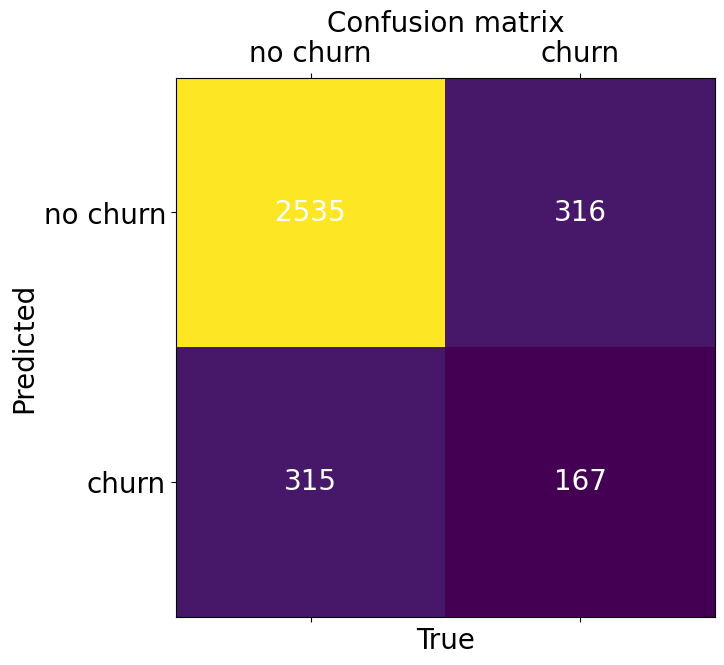

              precision    recall  f1-score   support

           0       0.89      0.89      0.89      2850
           1       0.35      0.35      0.35       483

    accuracy                           0.81      3333
   macro avg       0.62      0.62      0.62      3333
weighted avg       0.81      0.81      0.81      3333



In [5]:
def draw_confusion(y,yhat,labels):
    cm = metrics.confusion_matrix(y, yhat)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.matshow(cm)
    plt.title('Confusion matrix',size=20)
    ax.set_xticklabels([''] + labels, size=20)
    ax.set_yticklabels([''] + labels, size=20)
    plt.ylabel('Predicted',size=20)
    plt.xlabel('True',size=20)
    for i in range(2):
        for j in range(2):
            ax.text(i, j, cm[i,j], va='center', ha='center',color='white',size=20)
    fig.set_size_inches(7,7)
    plt.show()

draw_confusion(y,yhat,['no churn', 'churn'])
print (metrics.classification_report(y,yhat))

### Feature Engineering: Standardization

This is quite a bad result. Remember that by always selecting class 'no churn' we should get around $85\%$ of accuracy. As it was noticed before the definition of distance is critical. In NN we are using Euclidean distance. Distances assume that all variables operate at the same scale, i.e. all are commensurable. A change in one unit in one of the variables is equivalent to/as important as a change of 1 unit in the other. In this data set, this does not happen. For example, area codes values are around 400 while whether the customer enjoys an international plan take values 0 and 1. Thus, we may account for these changes by scaling the features. The most standard way of doing this is feature normalization or standarization. In this preprocessing technique each feature is scaled to have zero mean and unit standard deviation.

In [6]:
# Standarize
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [7]:
## In machine learning and data analysis, "snooping" refers to a scenario where information from outside the training dataset is inadvertently used to make decisions about the model.

from sklearn import metrics
acc_snooping = np.zeros((5,))
i=0
kf=model_selection.KFold(n_splits=5, shuffle=False)
kf.get_n_splits()
#We will build the predicted y from the partial predictions on the test of each of the folds
yhat = y.copy()
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    dt = neighbors.KNeighborsClassifier(1)
    dt.fit(X_train,y_train)
    yhat[test_index] = dt.predict(X_test)
    acc_snooping[i] = metrics.accuracy_score(yhat[test_index], y_test)
    i=i+1
print ('Mean accuracy: '+ str(np.mean(acc_snooping)))


Mean accuracy: 0.86468927698313


**QUESTION:** In the former process we have accidentally snooped into the data and the result is contaminated. Where?</div>

### Data Snooping

In [8]:
#NO SNOOPING
acc = np.zeros((5,))
i=0
#We will build the predicted y from the partial predictions on the test of each of the folds
yhat = y.copy()
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    dt = neighbors.KNeighborsClassifier(1)
    dt.fit(X_train,y_train)
    X_test = scaler.transform(X_test)
    yhat[test_index] = dt.predict(X_test)
    acc[i] = metrics.accuracy_score(yhat[test_index], y_test)
    i=i+1
print ('Mean accuracy: '+ str(np.mean(acc)))

Mean accuracy: 0.864388526457492


[Text(1, 0, 'snooping'), Text(2, 0, 'no snooping')]

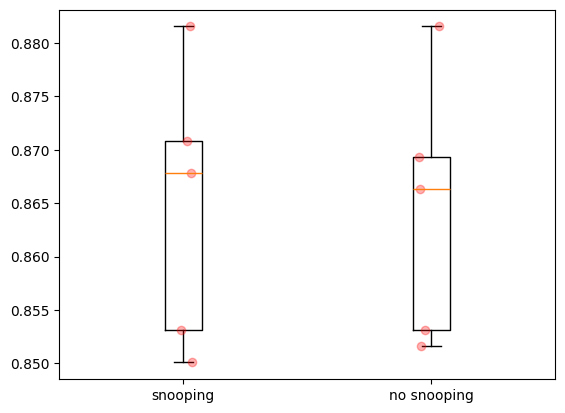

In [9]:
acct=np.c_[acc_snooping,acc]
plt.boxplot(acct);
for i in range(2):
    xderiv = (i+1)*np.ones(acct[:,i].shape)+(np.random.rand(5,)-0.5)*0.1
    plt.plot(xderiv,acct[:,i],'ro',alpha=0.3)
ax = plt.gca()
ax.set_xticklabels(['snooping', 'no snooping'])

/var/folders/sb/bdh1wr117yqfkv_bvrcwfxp80000gn/T/ipykernel_10022/3338893031.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([''] + labels, size=20)
/var/folders/sb/bdh1wr117yqfkv_bvrcwfxp80000gn/T/ipykernel_10022/3338893031.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([''] + labels, size=20)


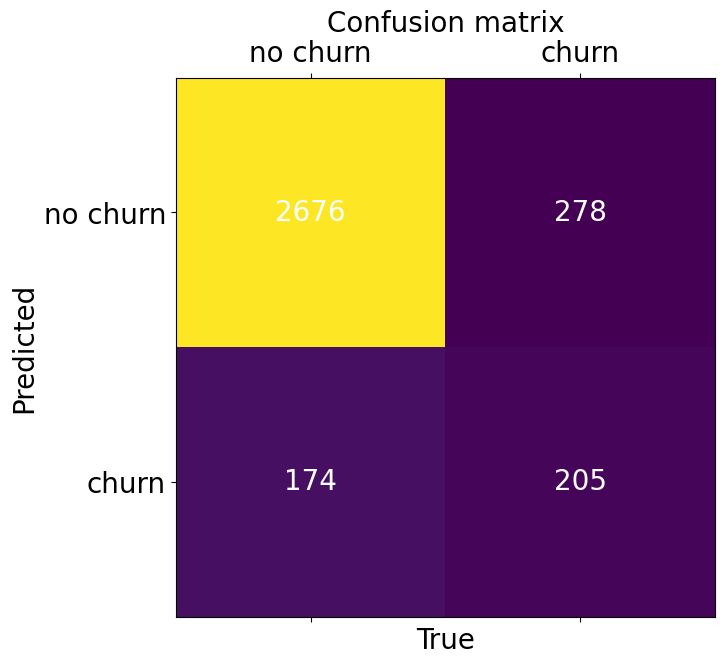

              precision    recall  f1-score   support

           0       0.91      0.94      0.92      2850
           1       0.54      0.42      0.48       483

    accuracy                           0.86      3333
   macro avg       0.72      0.68      0.70      3333
weighted avg       0.85      0.86      0.86      3333



In [10]:
def draw_confusion(y,yhat,labels):
    cm = metrics.confusion_matrix(y, yhat)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.matshow(cm)
    plt.title('Confusion matrix',size=20)
    ax.set_xticklabels([''] + labels, size=20)
    ax.set_yticklabels([''] + labels, size=20)
    plt.ylabel('Predicted',size=20)
    plt.xlabel('True',size=20)
    for i in range(2):
        for j in range(2):
            ax.text(i, j, cm[i,j], va='center', ha='center',color='white',size=20)
    fig.set_size_inches(7,7)
    plt.show()

draw_confusion(y,yhat,['no churn', 'churn'])
print (metrics.classification_report(y,yhat))

### Evaluation Metrics from Confusion Matrix

This result is much better. As we have seen accuracy can be a little informative in some problems. For this reason we may use other performance measures. Classic performance measures can be derived from the confusion matrix. Consider the following confusion matrix:

/var/folders/sb/bdh1wr117yqfkv_bvrcwfxp80000gn/T/ipykernel_10022/2442502195.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([''] + labels, size=20)
/var/folders/sb/bdh1wr117yqfkv_bvrcwfxp80000gn/T/ipykernel_10022/2442502195.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([''] + labels, size=20)


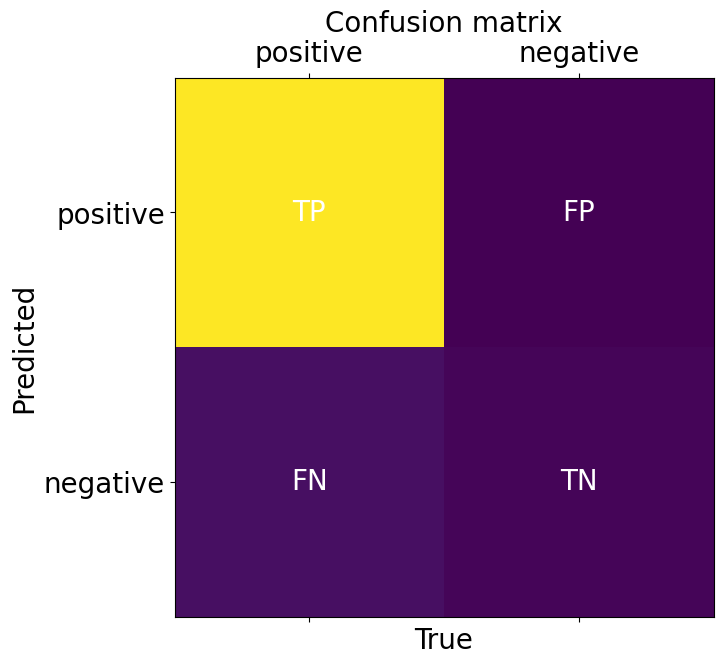

In [11]:
def draw_confusion(y,yhat,labels):
    cm = metrics.confusion_matrix(y, yhat)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.matshow(cm)
    plt.title('Confusion matrix',size=20)
    ax.set_xticklabels([''] + labels, size=20)
    ax.set_yticklabels([''] + labels, size=20)
    plt.ylabel('Predicted',size=20)
    plt.xlabel('True',size=20)
    ax.text(0, 0, 'TP', va='center', ha='center',color='white',size=20)
    ax.text(0, 1, 'FN', va='center', ha='center',color='white',size=20)
    ax.text(1, 0, 'FP', va='center', ha='center',color='white',size=20)
    ax.text(1, 1, 'TN', va='center', ha='center',color='white',size=20)            
    fig.set_size_inches(7,7)
    plt.show()

draw_confusion(y,yhat,['positive', 'negative'])

The matrix is divided in four quarters and contains

+ True Positives (TP): Positive samples predicted as such.
+ True Negatives (TN): Negative samples predicted as such.
+ False Positives (FP): Negative samples predicted as positive.
+ False Negatives (FN): Positive samples predicted as negative.

The combination of these elements allows to define several performance metrics:

+ Accuracy: 

$$\text{accuracy}=\frac{\text{TP}+\text{TN}}{\text{TP}+\text{TN}+\text{FP}+\text{FN}}$$

Column-wise we find these two partial performance metrics:

+ Sensitivity or Recall: 

$$\text{sensitivity}=\frac{\text{TP}}{\text{Real Positives}}=\frac{\text{TP}}{\text{TP}+\text{FN}}$$

+ Specificity:

$$\text{specificity}=\frac{\text{TN}}{\text{Real Negatives}}=\frac{\text{TN}}{\text{TN}+\text{FP}}$$

Row-wise we find these two partial performance metrics:

+ Precision or Positive Predictive Value:

$$\text{precision}=\frac{\text{TP}}{\text{Predicted Positives}}=\frac{\text{TP}}{\text{TP}+\text{FP}}$$

+ Negative predictive value:

$$\text{NPV}=\frac{\text{TN}}{\text{Predicted Negative}}=\frac{\text{TN}}{\text{TN}+\text{FN}}$$

The concept of positive and negative samples is purely arbitrary, thus we really have to remember the concepts of precision/positive predictive value and sensitivity/recall. 

In [12]:
# Let us check the concepts with churn as the positive class
TP = np.sum(np.logical_and(yhat==1,y==1))
TN = np.sum(np.logical_and(yhat==0,y==0))
FP = np.sum(np.logical_and(yhat==1,y==0))
FN = np.sum(np.logical_and(yhat==0,y==1))

print ('TP: ' + str(TP))
print ('TN: ' + str(TN))
print ('FP: ' + str(FP))
print ('FN: ' + str(FN))
print ('sensitivity/recall: '+ str(TP/(TP+FN)))
print ('precision: '+ str(TP/(TP+FP)))


TP: 205
TN: 2676
FP: 174
FN: 278
sensitivity/recall: 0.4244306418219462
precision: 0.5408970976253298


#### <ins>When to Use Recall and Precision</ins>

In the context of classification tasks, understanding when to prioritize recall or precision can greatly impact the effectiveness of your model, especially in different real-world scenarios.

#### Recall (Sensitivity)

- **When to Use**: Recall should be prioritized when the cost of false negatives is high. In other words, when it's crucial to capture as many positive instances as possible.
- **Example Scenario**: Medical diagnostics where failing to detect a disease (false negative) could be life-threatening. In such cases, it's better to have some false alarms (false positives) than to miss a positive case.
  
$$\text{recall} = \frac{\text{TP}}{\text{TP} + \text{FN}}$$

#### Precision (Positive Predictive Value)

- **When to Use**: Precision should be prioritized when the cost of false positives is high. This is important when the goal is to be as accurate as possible with the positive predictions.
- **Example Scenario**: Email spam detection where it's more disruptive to wrongly classify important emails as spam (false positives) than to miss some spam emails (false negatives).

$$\text{precision} = \frac{\text{TP}}{\text{TP} + \text{FP}}$$

#### Specificity

- **When to Use**: Specificity should be prioritized when it's important to capture true negatives. This metric is crucial when the presence of a condition is to be ruled out with certainty.
- **Example Scenario**: Screening a rare disease in a large population, where it's important to identify those who definitely don't have the disease.

$$\text{specificity} = \frac{\text{TN}}{\text{TN} + \text{FP}}$$

#### Choosing the Right Metric

Deciding whether to prioritize recall or precision (or specificity) often depends on the relative costs of false positives versus false negatives:

- **High Cost of False Negatives**: Prioritize recall.
- **High Cost of False Positives**: Prioritize precision.
- **Balanced Approach Needed**: Consider using the F1-score, which is the harmonic mean of precision and recall, or the AUC-ROC curve, which considers both true positive rate (recall) and false positive rate (1 - specificity).

Remember, the choice of metric should align with the business objectives or the specific requirements of the task at hand.


#### Analyzing the confusion matrix in our problem

Our goal is to predict custormer churn, thus we may ask how often the classifier correctly predicts it. We will consider "churn" as the positive class. The question we are wondering about is the ratio between the $TP$ and all the $\text{Real Positives}$. This is the *sensitivity* or *recall*. We are able to correctly predict $187/(187+296) = 0.39$ of the customers that cease the service. Observe that this value is consistent with the classification report when checking recall for class $1$.

However, we have to trade-off this value with *precision*. Precision answers the question, from all the customers we predict will churn, which is the ratio of those that actually churn? This effectively tells us the price we are paying in terms of how many non-churn customers are being predicted as quitters. If we check this value, we can see it is $187/(187+59) = 76\%$. This means that about 1 out 4 customers predicted as churn are not quitting the service.

**Nearest Neighbors**
<p>
<ul>
<li> One of the simplest classifiers.
<li> Smoothness of the model is governed by the number of the neighbors.
<li> Hyper-parameter $k$ or $p$ in the $\ell_p$ norm are set by cross-validation.
</ul>
</div>

## Logistic Regression

In [13]:
# Supervised Learning Class

from sklearn.datasets import load_breast_cancer
import pandas as pd

cancer = load_breast_cancer()
print("cancer.keys(): \n{}".format(cancer.keys()))
print(cancer['target_names'])

data = pd.DataFrame(cancer['data'], columns = cancer['feature_names'])
target = pd.DataFrame(cancer['target'], columns = ['target'])
data.head()

from sklearn.linear_model import LogisticRegression
## train vs cross validation
from sklearn.model_selection import cross_validate

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(cancer['data'], cancer['target'], random_state=0)

model = LogisticRegression()

model.fit(X_train, y_train)

print(model.score(X_train, y_train))
print(cross_validate(model,X_train, y_train, cv = 5)['test_score'].mean())

/Users/joaorochaemelo/code/IH/venv_ironhack/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/joaorochaemelo/code/IH/venv_ironhack/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

cancer.keys(): 
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
['malignant' 'benign']
0.9483568075117371
0.9459097127222982


/Users/joaorochaemelo/code/IH/venv_ironhack/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/joaorochaemelo/code/IH/venv_ironhack/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

## Decision trees

### Introduction to Decision Trees in Classification

Decision trees are a popular machine learning technique used for both classification and regression tasks. They are especially known for their interpretability and ease of use. A decision tree operates by breaking down a dataset into smaller and smaller subsets based on different criteria, and decisions are made based on those subdivisions.

### Basic Idea

The core **idea** behind decision trees is the "divide and conquer" approach. This involves:

1. **Partitioning the space**: The dataset's feature space is divided into distinct regions. For classification tasks, these regions are chosen to best separate the different classes.
2. **Fitting a model in each patch**: After partitioning, a simple model (or decision) is applied in each region.

In **classification trees**, each partition (or "leaf") represents a class, and all data points that fall into a region are assigned the corresponding class label.

### Key Concepts in Decision Trees

#### Gini Index

- The Gini index is a metric used to measure how often a randomly chosen element from the set would be incorrectly labeled if it was randomly labeled according to the distribution of labels in the subset. Gini index can be represented as:

  $$\text{Gini}(D) = 1 - \sum_{i=1}^m p_i^2$$

  where $D$ is the dataset and $p_i$ is the proportion of the elements labeled with the current class.

- **Usage**: During the construction of a tree, the Gini index is used to evaluate the partitions, and the decision tree algorithm will favor splits that result in regions with the lowest Gini index — that is, the most homogeneous groups.

#### Entropy and Information Gain

- **Entropy** is another measure used to determine how a space should be split. It quantifies the amount of uncertainty or randomness in the data. Entropy can be calculated as:

  $$\text{Entropy}(S) = - \sum_{i=1}^m p_i \log_2 p_i$$

- **Information Gain** is the reduction in entropy after a dataset is split on an attribute. It is used to decide which feature to split on at each step in building the tree.

#### Tree Pruning

- To avoid overfitting, decision trees need to control their growth. **Pruning** is a technique that removes parts of the tree to make it simpler and prevent it from modeling noise in the training data.

#### Advantages and Limitations

- **Advantages**: Decision trees are easy to understand and interpret, can handle both numerical and categorical data, and require relatively little data preparation.
- **Limitations**: They can create overly complex trees that do not generalize well from the training data (overfitting), and small variations in the data can result in different

### 1.2.1 Decision tree modeling

Elements:

- Splits using axis-orthogonal hyperplanes. This is the key that allows interpretability of the results.

- At each internal node we test a value of a feature. A feature and a threshold are stored for each internal node.  

- Leaves makes the class prediction. If leaves are pure, we have to store the class label. If leaves are impure, then the fraction of samples for each class is stored and its frequency is returned when queried.



#### Building our intuition on decision trees

Let us build up our intuition with a simple example.

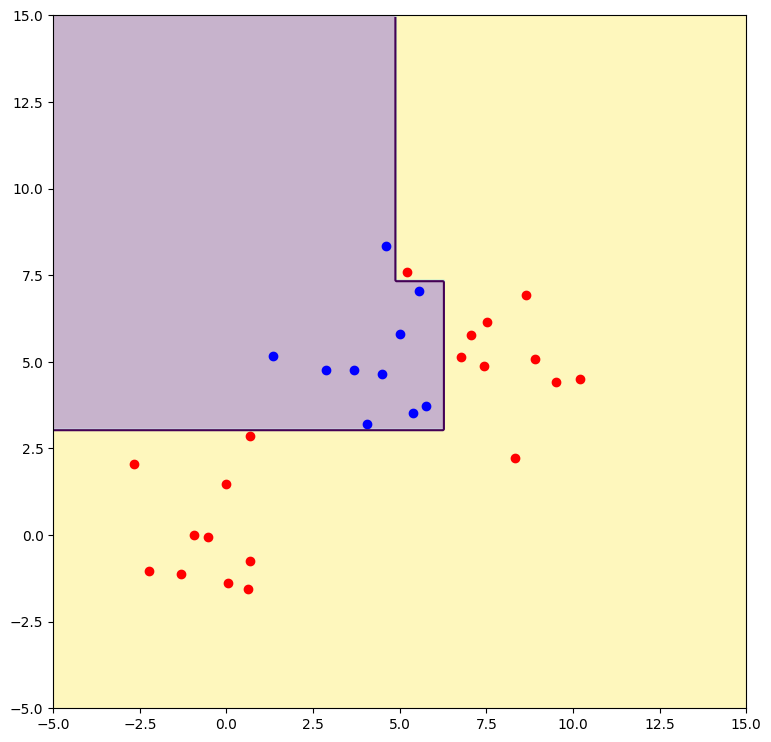

In [14]:
%matplotlib inline
#Let's see what the boundary looks like in a toy problem.
%reset -f
import numpy as np
import matplotlib.pyplot as plt
MAXN=10
np.random.seed(2)
X = np.concatenate([1.25*np.random.randn(MAXN,2),5+1.5*np.random.randn(MAXN,2)]) 
X = np.concatenate([X,[8,5]+1.5*np.random.randn(MAXN,2)])
y = np.concatenate([np.ones((MAXN,1)),-np.ones((MAXN,1))])
y = np.concatenate([y,np.ones((MAXN,1))])
idxplus = y==1
idxminus = y==-1
plt.scatter(X[idxplus.ravel(),0],X[idxplus.ravel(),1],color='r')
plt.scatter(X[idxminus.ravel(),0],X[idxminus.ravel(),1],color='b')

from sklearn import tree
from sklearn import metrics

delta = 0.05
xx = np.arange(-5.0, 15.0, delta)
yy = np.arange(-5.0, 15.0, delta)
XX, YY = np.meshgrid(xx, yy)
Xf = XX.flatten()
Yf = YY.flatten()
sz=XX.shape
data = np.c_[Xf[:,np.newaxis],Yf[:,np.newaxis]];
clf = tree.DecisionTreeClassifier(random_state=0)
clf.fit(X,y.ravel())
Z=clf.predict(data)
Z.shape=sz

plt.imshow(Z, interpolation='bilinear', origin='lower', extent=(-5,15,-5,15),alpha=0.3, vmin=-1, vmax=1)
plt.contour(XX,YY,Z,[0])
fig = plt.gcf()
fig.set_size_inches(9,9)

In [15]:
!dot -V


dot - graphviz version 12.1.1 (20240910.0053)


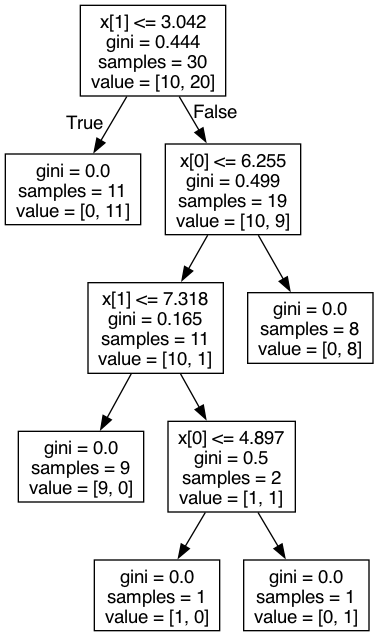

In [16]:
#!pip install scikit-learn graphviz pydot
#Export Tree
import os
dotfile = tree.export_graphviz(clf, out_file = "toy_tree.dot")

os.system("dot -Tpng toy_tree.dot -o toy_tree.png")

from IPython.core.display import Image
Image("toy_tree.png")

Let us check the meaning of the tree. The first node splits the training set using feature $1$ by applying the threshold $\leq 3.04$. As a result we are able to correctly classify eleven of the thirty data points. Let us see the boundary in that case.

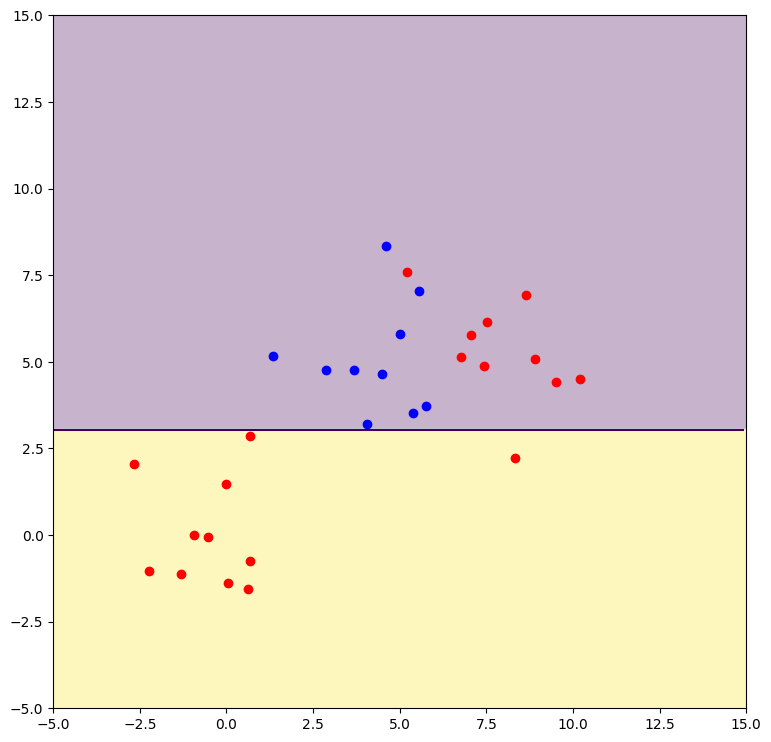

In [17]:
clf = tree.DecisionTreeClassifier(random_state=0,max_depth=1)
clf.fit(X,y.ravel())
Z=clf.predict(data)
Z.shape=sz

plt.scatter(X[idxplus.ravel(),0],X[idxplus.ravel(),1],color='r')
plt.scatter(X[idxminus.ravel(),0],X[idxminus.ravel(),1],color='b')


plt.imshow(Z, interpolation='bilinear', origin='lower', extent=(-5,15,-5,15),alpha=0.3, vmin=-1, vmax=1)
plt.contour(XX,YY,Z,[0])
fig = plt.gcf()
fig.set_size_inches(9,9)

The second node splits the training set using feature $0$ by applying the threshold $\leq 6.25$. Note that this only is used in the part of the space where feature $1$ is greater  than $3.04$. Observe that the remaining blue space is characterized by the following logical function: $(x_1>3.04) \wedge (x_0\leq 6.25)$

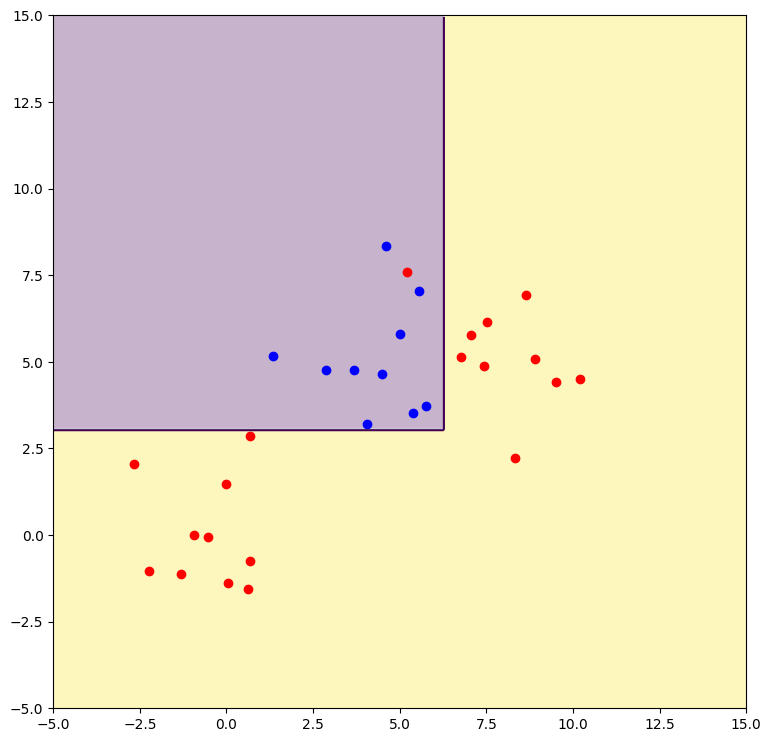

In [18]:
clf = tree.DecisionTreeClassifier(random_state=0, max_depth=2)
clf.fit(X,y.ravel())
Z=clf.predict(data)
Z.shape=sz

plt.scatter(X[idxplus.ravel(),0],X[idxplus.ravel(),1],color='r')
plt.scatter(X[idxminus.ravel(),0],X[idxminus.ravel(),1],color='b')

plt.imshow(Z, interpolation='bilinear', origin='lower', extent=(-5,15,-5,15),alpha=0.3, vmin=-1, vmax=1)
plt.contour(XX,YY,Z,[0])
fig = plt.gcf()
fig.set_size_inches(9,9)

What is great about decision trees?

+ Trees are easy for humans to interpret. It can be seen as a set of rules. Each path from root to one leaf of the tree is an AND combination of the thresholded features.
+ Given a finite data set, decision trees can express any function of the input attributes. In ${\bf R}^d$ we can isolate every point in the data set by constructing a box around each of them.
+ There can be more than one tree that fits the same data. From all of them we would like a tree with minimum number of nodes. But the problem is NP.

#### Learning the tree

Because the problem is NP we can resort to a greedy construction algorithm. Greedy algorithms choose the current best binary partition without taking into account its impact on the quality of subsequent splits.

The algorithm idea is as follows:

+ Initialize the algorithm with a node associated to the full data set. 

**while** the list is not empty
1. Retrieve the first node from the list.
2. Find the data associated to that node.
3. Find a splitting point.
4. If the node is splittable, create the nodes linked to the parent node and put them in the exploration list.

#### The splitting criterion

There are many different splitting criteria. The most common ones are:

+ Misclassification error
+ Gini index
+ Cross-entropy/Information gain/Mutual information

Withouth going into details: 

 - Misclassification error splits greedily select the split that corrects more data at each point. 
 - Gini index and cross-entropy probabilistically model the notion of impurity of a node. The split is chosen so that the average purity of the new nodes is maximized. Observe that as we descend in the tree the purity increases and eventually converge to pure leaves.
 - Entropy measures the average surprise/information a probabilistic result yields. In a binary variable, the maximum surprise occurs when both outcomes are equally probable, one has the maximum uncertainty on the result. Otherwise, the surprise decreases. This behavior is also display in Gini's index.

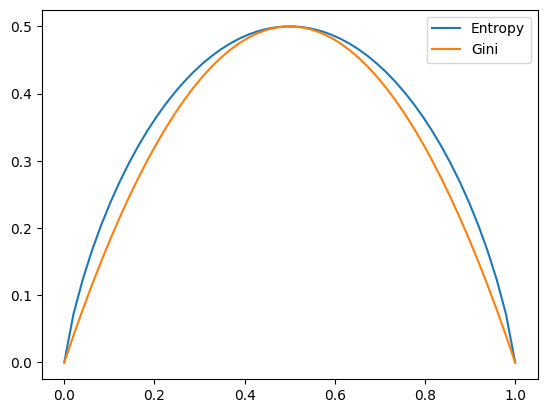

In [19]:
import numpy as np
entropy = lambda p: -np.sum(p * np.log2(p)) if not 0 in p else 0
gini = lambda p: 1. - (np.array(p)**2).sum()
pvals = np.linspace(0, 1)        
plt.plot(pvals, [entropy([p,1-p])/2. for p in pvals], label='Entropy')
plt.plot(pvals, [gini([p,1-p]) for p in pvals], label='Gini')
plt.legend()

#### Trees and overfitting

Because trees are very expressive models they can model any training set perfectly and easily overfit.

There are two ways of avoiding overfitting in trees:

+ Stop growing the tree when the split is not statistically significant.
+ Grow a full tree and post-prune.

One of the simplest ways of post pruning is "reduced error prunning". It goes like this,

1. Split data into training and validation
2. Create a candidate tree on the training set
3. Do until further pruning is harmful
    1. Evaluate impact on the validation set of removing each posible node (with descendants)
    2. Greedily remove the node that improves the performance the most.
    
Pruning is not implemented in sklearn at this moment. However let us check what happens in our customer churn prediction problem when we use a decision tree.

In [20]:
%reset -f
#Recover Churn data
import pickle
fname = open('churn_data.pkl','rb')
data = pickle.load(fname)
X = data[0]
y = data[1]
features = data[2]
print ('Loading ok.')

Loading ok.


In [21]:
#NO SNOOPING
import numpy as np
from sklearn import model_selection
from sklearn import tree
from sklearn import metrics


kf=model_selection.KFold(n_splits=5, shuffle=False)
kf.get_n_splits()
acc = np.zeros((5,))
i=0
#We will build the predicted y from the partial predictions on the test of each of the folds
yhat = y.copy()
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    dt = tree.DecisionTreeClassifier(criterion='entropy')
    dt.fit(X_train,y_train)

    yhat[test_index] = dt.predict(X_test)
    acc[i] = metrics.accuracy_score(yhat[test_index], y_test)
    i=i+1
print ('Mean accuracy: '+ str(np.mean(acc)))

Mean accuracy: 0.9162950056503281


/var/folders/sb/bdh1wr117yqfkv_bvrcwfxp80000gn/T/ipykernel_10022/1347475485.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([''] + labels, size=20)
/var/folders/sb/bdh1wr117yqfkv_bvrcwfxp80000gn/T/ipykernel_10022/1347475485.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([''] + labels, size=20)


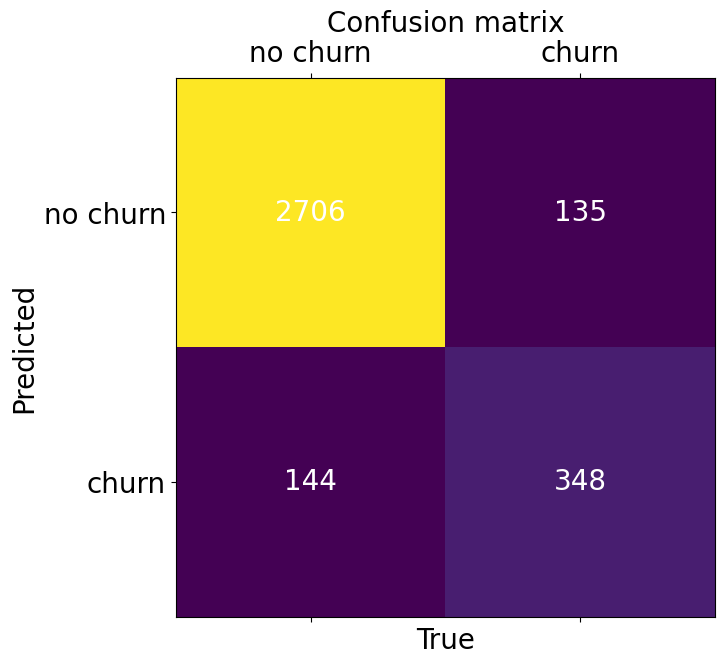

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      2850
           1       0.71      0.72      0.71       483

    accuracy                           0.92      3333
   macro avg       0.83      0.83      0.83      3333
weighted avg       0.92      0.92      0.92      3333



In [22]:
import matplotlib.pyplot as plt
def draw_confusion(y,yhat,labels):
    cm = metrics.confusion_matrix(y, yhat)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.matshow(cm)
    plt.title('Confusion matrix',size=20)
    ax.set_xticklabels([''] + labels, size=20)
    ax.set_yticklabels([''] + labels, size=20)
    plt.ylabel('Predicted',size=20)
    plt.xlabel('True',size=20)
    for i in range(2):
        for j in range(2):
            ax.text(i, j, cm[i,j], va='center', ha='center',color='white',size=20)
    fig.set_size_inches(7,7)
    plt.show()

draw_confusion(y,yhat,['no churn', 'churn'])
print (metrics.classification_report(y,yhat))

In [23]:
# Let us check the concepts with churn as the positive class
TP = np.sum(np.logical_and(yhat==1,y==1))
TN = np.sum(np.logical_and(yhat==0,y==0))
FP = np.sum(np.logical_and(yhat==1,y==0))
FN = np.sum(np.logical_and(yhat==0,y==1))

print ('TP: ' + str(TP))
print ('TN: ' + str(TN))
print ('FP: ' + str(FP))
print ('FN: ' + str(FN))
print ('sensitivity/recall: '+ str(TP/(TP+FN)))
print ('precision: '+ str(TP/(TP+FP)))

TP: 348
TN: 2706
FP: 144
FN: 135
sensitivity/recall: 0.7204968944099379
precision: 0.7073170731707317


Observe that by using a decision tree, the recall increased by $30\%$ while having the precision at a simliar level than nearest neighbors. Let us check the first levels of the tree.

,Account Length,Area Code,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls
0,128.0,415.0,0.0,1.0,25.0,265.1,110.0,45.07,197.4,99.0,16.78,244.7,91.0,11.01,10.0,3.0,2.70,1.0
1,107.0,415.0,0.0,1.0,26.0,161.6,123.0,27.47,195.5,103.0,16.62,254.4,103.0,11.45,13.7,3.0,3.70,1.0
2,137.0,415.0,0.0,0.0,0.0,243.4,114.0,41.38,121.2,110.0,10.30,162.6,104.0,7.32,12.2,5.0,3.29,0.0
3,84.0,408.0,1.0,0.0,0.0,299.4,71.0,50.90,61.9,88.0,5.26,196.9,89.0,8.86,6.6,7.0,1.78,2.0
4,75.0,415.0,1.0,0.0,0.0,166.7,113.0,28.34,148.3,122.0,12.61,186.9,121.0,8.41,10.1,3.0,2.73,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192.0,415.0,0.0,1.0,36.0,156.2,77.0,26.55,215.5,126.0,18.32,279.1,83.0,12.56,9.9,6.0,2.67,2.0
3329,68.0,415.0,0.0,0.0,0.0,231.1,57.0,39.29,153.4,55.0,13.04,191.3,123.0,8.61,9.6,4.0,2.59,3.0
3330,28.0,510.0,0.0,0.0,0.0,180.8,109.0,30.74,288.8,58.0,24.55,191.9,91.0,8.64,14.1,6.0,3.81,2.0
3331,184.0,510.0,1.0,0.0,0.0,213.8,105.0,36.35,159.6,84.0,13.57,139.2,137.0,6.26,5.0,10.0,1.35,2.0


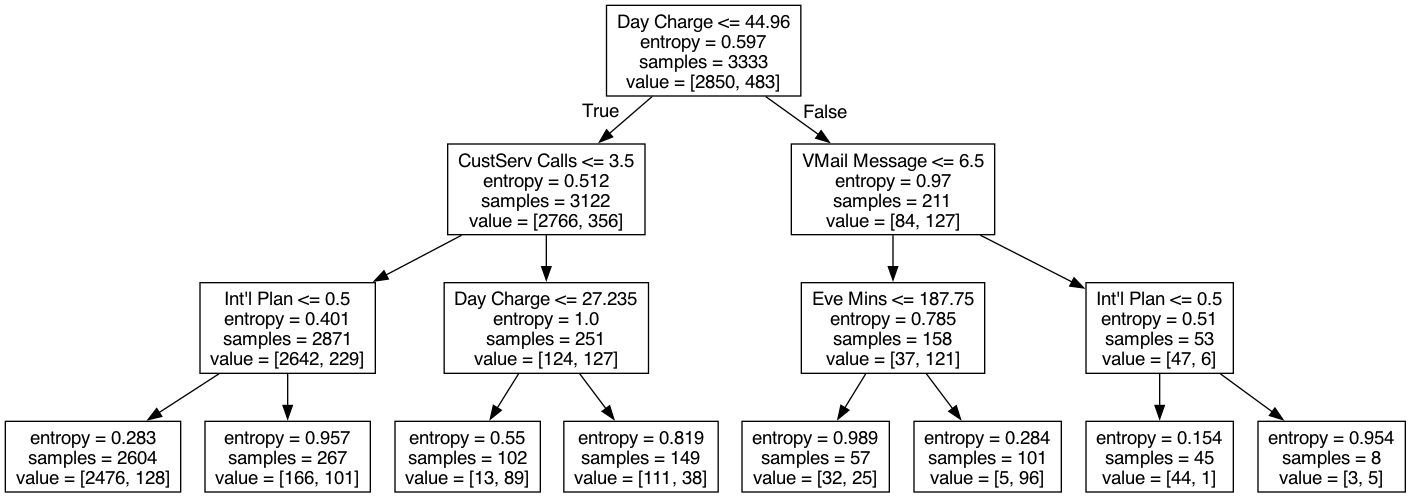

In [24]:
import os
#Let us check the the first three levels of the tree. GraphViz and PyDot are needed.
dt = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3)
#scaler = StandardScaler()
#Xs = scaler.fit_transform(X)
dt.fit(X,y)

import pandas as pd
display(pd.DataFrame(X, columns = features))

#Export Tree

dotfile = tree.export_graphviz(dt, out_file = "churn.dot", feature_names = features)

os.system("dot -Tpng churn.dot -o churn.png")
from IPython.core.display import Image
Image("churn.png")

Observe the first feature split and the values of the entropy according to the split.

In [25]:
entropy = lambda p: -np.sum(p * np.log2(p)) if not 0 in p else 0

#Let us check the entropy on the root node
#There are 2850 samples of customers that stay in the company. The frequency is
proot = 2850/3333
#And the entropy value is
print( 'Root node entropy: '+ str(entropy([proot,1-proot])))

#After the split we have the following frequencies for the left and right children
pleft = 2766/3122 #Frequency of label 0 on the left node
pright = 84/211 #Frequency of label 0 on the right node

print( 'Left node entropy: '+ str(entropy([pleft,1-pleft])))
print ('Right node entropy: '+ str(entropy([pright,1-pright])))
print("Weighted mean of Entropy: ", entropy([pleft,1-pleft])*3122/3333 + entropy([pright,1-pright])*211/3333)

#Information gain computes the difference between the entropy of the parent and the weighed entropies of the children
# I = H_root - \sum freq_i * H_i

I = entropy([proot,1-proot]) - 3122/3333*entropy([pleft,1-pleft])+211/3333*entropy([pright,1-pright])

print ('Information gain: '+ str(I))

Root node entropy: 0.5969661117996699
Left node entropy: 0.5119516728279073
Right node entropy: 0.9698308534774178
Weighted mean of Entropy:  0.5409383236281013
Information gain: 0.1788206535083433


The split reduces the average entropy of the children, thus the splits are more pure.

Observations:

+ Observe that because we have restricted (for visualization purposes) the maximum depth of the tree, the leaves are not pure. 
+ Analyzing the leaves we can see that most of the clients that are hooked to the plan share the following conditions:

$$(\text{Day Charge} \geq 44.96) \wedge (\text{VMail Plan} = \text{YES}) \wedge (\text{International Plan} = \text{YES})$$


## Bayesian models (Naive Bayes) and some applications

Bayesian models (Naive Bayes) and some applications

Imagine we have a big basket of fruits, and we want to sort them into types like apples, bananas, and oranges. This task is similar to what the Naive Bayes classifier does in the world of machine learning, but instead of sorting fruits, it sorts information.

#### What is Naive Bayes?

Naive Bayes is like a smart sorting machine that helps us organize things based on what it knows about them. For our fruit example, think of Naive Bayes as a friend who helps you sort fruits by telling you which fruit is likely to be an apple, a banana, or an orange, based on their characteristics like color, shape, and taste.

- **Bayes' Theorem**: This is the rule our sorting machine uses. It's a mathematical formula that helps predict the type of fruit based on its features. For instance, if you tell it a fruit is long and yellow, Bayes' Theorem helps it guess that it's probably a banana.

- **Naive Assumption**: The "naive" part comes from the machine treating each feature (like color or shape) as if it's completely independent of the others. Even though this isn't how things work in real life (for example, oranges are both orange and round), this assumption makes our machine very fast and surprisingly good at guessing!

#### How Does Naive Bayes Sort Fruits?

Let's break it down into simple steps:

1. **Learning**: First, you show the machine lots of different fruits and tell it what they are. This is like teaching it the game by showing it examples.

2. **Guessing**: After learning, when you give the machine a new fruit it hasn't seen before, it uses what it learned to guess the fruit's type. It looks at the fruit's features (color, shape, taste) and calculates which type it's most likely to be.

##### Seeing Naive Bayes in Action

Imagine you draw circles around apples, bananas, and oranges based on their features. Naive Bayes does something similar in its mind. When a new fruit comes along, it sees where the fruit fits best based on the circles drawn from what it learned.

#### Why is Naive Bayes So Special?

Even though it makes simple assumptions, Naive Bayes can quickly sort through lots of information (or fruits) and make accurate guesses. It's like having a super-fast fruit sorter that gets better the more it learns.

Next, we'll see how we can use this amazing sorter not just for fruits, but for sorting all kinds of things, making our lives easier and more organized. We'll take it step by step, ensuring it's fun and easy to understand.

[Naive Bayes explained](https://www.youtube.com/watch?v=O2L2Uv9pdDA&ab_channel=StatQuestwithJoshStarmer)

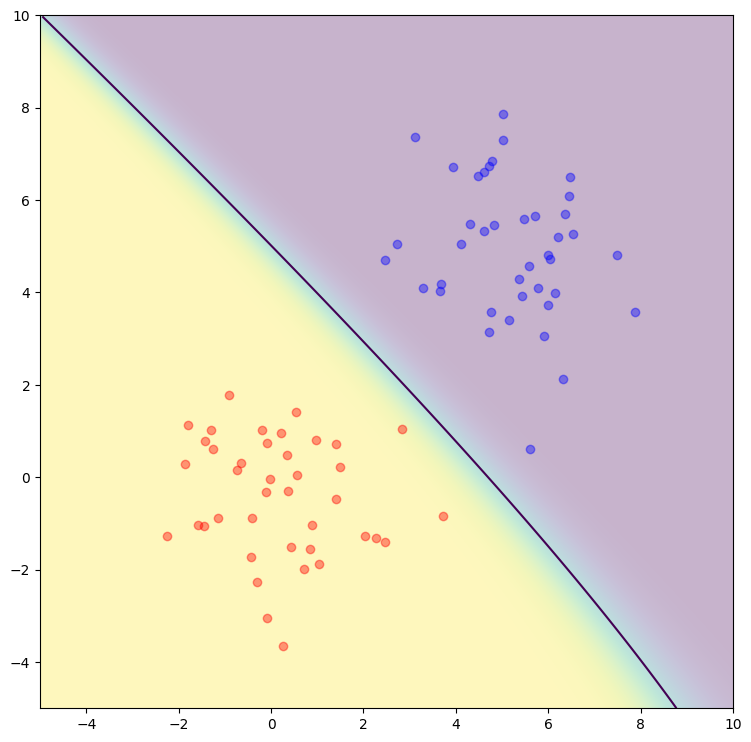

In [26]:
# Reset the environment to ensure a clean slate
%reset -f

# Enable plotting in the Jupyter Notebook
%matplotlib inline

# Import necessary libraries
import numpy as np
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt

# Create synthetic data for two groups
# The data for each group is generated around a different center point to simulate distinction
X = np.concatenate([1.25*np.random.randn(40,2), 5+1.5*np.random.randn(40,2)]) 
y = np.concatenate([np.ones((40,1)), -np.ones((40,1))])

# Initialize the Gaussian Naive Bayes classifier
nb = GaussianNB()
# Train the classifier with the synthetic data
nb.fit(X, y.ravel())

# Create a grid of points to visualize the decision boundary
delta = 0.025
xx = np.arange(-5.0, 10.0, delta)
yy = np.arange(-5.0, 10.0, delta)
XX, YY = np.meshgrid(xx, yy)

# Predict probabilities on the grid to visualize the decision boundary
Z = nb.predict_proba(np.c_[XX.ravel(), YY.ravel()])
Z = Z[:, 1].reshape(XX.shape)

# Plotting
plt.figure()
# Separate the data into two groups for plotting
idxplus = y == 1
idxminus = y == -1
idxplus = idxplus.flatten()
idxminus = idxminus.flatten()
# Plot the first group in red
plt.scatter(X[idxplus, 0], X[idxplus, 1], color='r', alpha=0.4)
# Plot the second group in blue
plt.scatter(X[idxminus, 0], X[idxminus, 1], color='b', alpha=0.4)
# Overlay the probability density to visualize the decision boundary
plt.imshow(Z, interpolation='bilinear', origin='lower', extent=(-5, 10, -5, 10), alpha=0.3, vmin=0, vmax=1)
# Draw the contour line where the probability is 0.5 (decision boundary)
plt.contour(XX, YY, Z, [0.5])
# Adjust the figure size for better visibility
fig = plt.gcf()
fig.set_size_inches(9, 9)

>If the boundary is not linear why is it considered a linear model? It is not a linear model, though it is an affine model with respect to the weights. In the particular case of text classification we will use certain probability density functions that will make the model linear.

The Gaussian Naive Bayes classifier, a cornerstone of machine learning, particularly shines in its simplicity and effectiveness in classification tasks. Through the Python example provided, we've visualized not just the classification process but also how Naive Bayes makes decisions based on probabilities.

#### Key Takeaways

- **Simplicity in Action**: The Naive Bayes classifier, despite its underlying assumption of feature independence, demonstrates robust performance in classifying data into distinct groups. This example, using synthetic data, showcases how even with basic assumptions, significant insights can be gleaned.

- **Visualization of Decision Boundaries**: By plotting the data points and the decision boundary, we gain a visual understanding of how Naive Bayes classifies data. The contour line at which the probability is 0.5 acts as the threshold—data points falling on one side of this line belong to one category, and those on the other side belong to another.

- **Probabilistic Approach**: The background gradient in the visualization represents the probability of belonging to one of the categories. This gradient illustrates the probabilistic nature of Naive Bayes, offering more than just classifications—it provides insights into the certainty of its predictions.



#### 10.1.1 Basic document representation

Imagine you're sorting through a pile of different stories, and you want to organize them into groups like "adventure tales" or "fairy tales." This is what we call **text classification**, and we use a method called Naive Bayes to help us figure out which group each story belongs to.

#### How Do We Understand Stories?

To help Naive Bayes sort stories, we first need to translate the stories into a format it can understand. We do this using a **bag-of-words** approach. Think of this as taking each story and breaking it down into a list of words that we're interested in.

- **Bag-of-Words Example**: Suppose we're interested in stories about "pirates" and "wizards." We decide to focus on certain words like "ship," "treasure," "wand," and "spell." We then see how many times these words appear in each story.

| Story | Ship | Treasure | Wand | Spell |
|-------|------|----------|------|-------|
| 1 (Pirates) | 3    | 2        | 0    | 0     |
| 2 (Pirates) | 2    | 1        | 0    | 1     |
| 3 (Wizards) | 0    | 0        | 2    | 3     |
| 4 (Wizards) | 0    | 1        | 3    | 2     |

- In this table, Story 1 has 3 "ship" words, 2 "treasure" words, and none of the "wand" or "spell" words, which helps Naive Bayes guess it's a pirate story.

#### How Naive Bayes Makes Its Guess

Naive Bayes looks at the word counts for each story. If a story has more "pirate" words like "ship" and "treasure," it guesses it's about pirates. If it has more "wizard" words like "wand" and "spell," it guesses it's about wizards.

#### Key Points to Remember

- **Counting vs. Presence**: Sometimes, just knowing whether a word appears in the story or not (yes/no) is enough, instead of counting how many times it appears.
- **Word Order Doesn't Matter**: With bag-of-words, the order of words is ignored. "The treasure is on the ship" and "The ship is on the treasure" would be seen as the same. Although they mean different things, for our purpose of sorting stories, this simple approach can still be very effective.

By transforming stories into bags of words, Naive Bayes assists us in categorizing them into themes like "pirates" or "wizards." Despite its simplicity, this method is a powerful tool for helping computers understand and organize stories, much like we do.

#### Understanding the Naive Bayes Classifier in Document Classification

Naive Bayes is a straightforward yet powerful approach used in predicting the category of documents. It's like playing a guessing game where, based on the words used in a document, we try to predict its topic, such as whether it's about "economics" or "technology."

#### How Naive Bayes Works

At its heart, Naive Bayes selects the category that is most likely to be correct based on the words present in the document. This is done using a mathematical formula known as Bayes' Theorem:

- To find out which category is the most probable, we use this formula:

  $$\hat{y} = \arg\max_y p(y|x).$$

  Here, $\hat{y}$ is our best guess for the category of the document, $y$ represents a possible category, and $x$ is the description of the document (like the words it contains).

- Bayes' Theorem helps us in this guessing game by relating different probabilities:

  $$p(y|x) = \frac{p(x|y)p(y)}{p(x)}.$$

  In simple terms, this tells us how likely a category is given the document's description. We calculate this by looking at how common the words are in each category ($p(x|y)$), how common each category is ($p(y)$), and how common these words are in all documents ($p(x)$).

#### Simplifying the Process

When we're classifying documents, we're essentially comparing which category is more likely based on the words used. For instance, if a document contains words more common in "economics" than in "technology," it will be classified under "economics."

- Interestingly, we don't need to worry about $p(x)$, the probability of seeing a particular set of words, because it doesn't change our decision. This simplifies our formula to:

  $$P(y|x) \propto P(y)P(x|y)$$

  This means we're mostly interested in how likely a category is ($P(y)$) and how likely we are to see these words if the document is in that category ($P(x|y)$).

#### Naive Bayes' Special Assumption

What makes Naive Bayes "naive" is its assumption that each word in the document affects the category independently of other words. This assumption allows us to simply multiply the probabilities of individual words relating to a category to find the overall likelihood:

$$p(x_1,x_2,...,x_N | y) = p(x_1|y)p(x_2|y)...p(x_N|y) = \prod\limits_{i=1}^N p(x_i|y)$$

For example, the probability that a document is about "technology" given it contains certain words can be calculated by multiplying the probabilities of each of those words belonging to the "technology" category.

#### Practical Application

When applying Naive Bayes to document classification, we might not always know the prior probability of each category ($p(y)$). In such cases, we might treat all categories as equally likely or use what's known as a non-informative prior. This leads us to focus on the likelihood of words within categories, simplifying our task to finding the most likely category based on the words in the document.

In summary, Naive Bayes helps us classify documents by comparing the probabilities of words within categories, making it a straightforward yet effective tool for understanding and organizing information.


#### 10.1.2 Estimating conditioned probabilities 

The last remaining step is the estimation of the individual conditional probabilities. There are two classical variants the **Multinomial Naive Bayes** and the **Bernoulli Naive Bayes**. The difference between both lies in the goal of what they are modeling. **In Multinomial NB we compute the probability of generating the observed document.** In this sense, we multiply the conditional probability of each word in the document for all words present in the document. An alternative view is the *Bernoulli model*. **In the Bernoulli Naive Bayes we compute the probability of the binary bag-of-words descriptor.** Observe that in the Bernouilli Naive Bayes the final probability depends on the words that appear in the document but also on the words that do not appear while in the multinomial NB it only depends on the words that appear. On the contrary, multinomial naive bayes takes into account the multiplicity of the words in the document while Bernoulli does not. Let us consider in this example the *Bernoulli model* that is consistent with our representation where a zero indicates a word is not present in the document and a one represents it is present. In order to estimate this probability we can use a frequentist approximation to probability, i.e. we will estimate the probability as the frequency of appearance of each term in each category. This computation divides the number documents where the word appears over the total number of documents. 

In our previous example, $p(x_3=1 (\text{the word 'price' appears})|y =\text{'tech'}) = 1/2$ and $p(x_3=1 (\text{the word 'price' appears})|y =\text{'eco'}) = 2/2$. This is computed by dividing the number of documents where the word price appear in a given category over the number of documents of that category.

#### The zero probability effect
In the former example the probability $p(x_5=1|y=\text{'eco'}) = 0$. This implies that if the word 'mobile' appears the document can not belong to the class $\text{'economy'}$. It is unreasonable to completely penalize a whole class by the appearance or not appearance of a single word. It is customary to assign to those cases a very low probability value instead. One well known approach to correct this effect is the so called **Laplace correction**. It is computed as follows,

$$p(x_i=1 | y=c_k ) = \frac{\text{# of documents of class } c_k \text{ where word } x_i \text{ appears} + 1}{\text{# of documents of class } c_k + M}$$

where $M$ is the amount of words in the description. 

#### Underflow effect

As the number of words in the description increase there is a higher probability that many of those words will not be present in the document. The product of many very small values may lead to floating point underflow effects. For this reason it is usual to use the log probability instead. This transformation does not change the decision boundary. In our simplified case

$$\log p(x|y) = \sum\limits_{i=1}^N \log p(x_i|y)$$

#### 10.1.3 Applying Naive Bayes to text classification

In this example, our goal is to automatically categorize news according to their title into twenty-eight standard topics. In this problem we will deal with every New York Times front page story from 1996 to 2006, coded according to the Policy Agendas (http://www.policyagendas.org). This collection of data has been compiled by Amber E. Boydstun.

Specifically, we are interested in classifying news from The New York Times in the following macro-topics according to its title:



<table border="1">
<tr>
<td>
1 
<td>
Macroeconomics
<tr>
<td>
2 
<td>
Civil Rights, Minority Issues, and Civil Liberties 
<tr>
<td>
3
<td>
Health
<tr>
<td>
4 
<td>Agriculture
<tr>
<td>
5 
<td>Labor, Employment, and Immigration
<tr>
<td>
6 
<td> Education
<tr>
<td>
7
<td>Environment
<tr>
<td>
8
<td>Energy
<tr>
<td>
10 
<td>Transportation
<tr>
<td>
12 
<td>Law, Crime, and Family Issues
<tr>
<td>
13 
<td>Social Welfare
<tr>
<td>
14 
<td>Community Development and Housing Issues
<tr>
<td>
15 
<td>Banking, Finance, and Domestic Commerce
<tr>
<td>
16 
<td>Defense
<tr>
<td>
17 
<td>Space, Science, Technology and Communications
<tr>
<td>
18 
<td>Foreign Trade
<tr>
<td>
19 
<td>International Affairs and Foreign Aid
<tr>
<td>
20 
<td>Government Operations
<tr>
<td>
21 
<td>Public Lands and Water Management
<tr>
<td>
24 
<td>State and Local Government Administration
<tr>
<td>
26 
<td>Weather and Natural Disasters
<tr>
<td>
27 
<td>Fires
<tr>
<td>
28 
<td>Arts and Entertainment
<tr>
<td>
29 
<td>Sports and Recreation
<tr>
<td>
30 
<td>Death Notices
<tr>
<td>
31 
<td>Churches and Religion
<tr>
<td>
99 
<td>Other, Miscellaneous, and Human Interest


In [27]:
%reset -f
#load data
import pandas as pd
data=pd.read_csv('Boydstun_NYT_FrontPage_Dataset_1996-2006_0.csv')
data.head()

,Article_ID,Date,Article_Sequence,Title,Summary,Topic_6digit,Topic_4digit,Topic_2digit,War on Terror,Katrina,Israel/Palestine,Immigration,Presidential Elections,Clinton Impeachment,Enron,Darfur,Race/Ethnicity,Schiavo
0,1,1/1/1996,a,Nation's Smaller Jails Struggle To Cope With S...,Jails overwhelmed with hardened criminals,120500,1205,12,0,0,0,0,0,0,0,0,0,0
1,2,1/1/1996,b,Dancing (and Kissing) In the New Year,new years activities,280000,2800,28,0,0,0,0,0,0,0,0,0,0
2,3,1/1/1996,c,Forbes's Silver Bullet for the Nation's Malaise,Steve Forbes running for President,201201,2012,20,0,0,0,0,1,0,0,0,0,0
3,4,1/1/1996,d,"Up at Last, Bridge to Bosnia Is Swaying Gatewa...",U.S. military constructs bridge to help their ...,160200,1602,16,0,0,0,0,0,0,0,0,0,0
4,5,1/1/1996,e,2 SIDES IN SENATE DISAGREE ON PLAN TO END FURL...,Democrats and Republicans can't agree on plan ...,201206,2012,20,0,0,0,0,0,0,0,0,0,0


Let us split the data set in two set: 
    
+ We will train the classifier with news up to 2004.
+ We will test the classifier in news from 2005 and 2006.

In [28]:
import numpy as np
import pandas as pd

# Splitting the dataset based on date: Training data will be from before 1/1/2004, and testing data from 2004 to 2006
split = pd.to_datetime(pd.Series(data['Date'])) < pd.Timestamp(2004, 1, 1)

# Extracting the 'Title' column as our raw data
raw_data = data['Title']

# Splitting the titles into training and testing sets based on the date
raw_train = raw_data[split]
raw_test = raw_data[np.logical_not(split)]

# Extracting the topic labels for our dataset
y = data['Topic_2digit']

# Splitting the labels into training and testing sets corresponding to our title splits
y_train = y[split]
y_test = y[np.logical_not(split)]

# Printing out the sizes of our training and testing datasets to ensure the split was done correctly
print('Check the split sizes, train, test and total amount of data:')
print(raw_train.shape, raw_test.shape, raw_data.shape)

# Displaying the unique labels in our dataset to understand the classification categories
print('Display the labels:')
print(np.unique(y))

Check the split sizes, train, test and total amount of data:
(23584,) (7450,) (31034,)
Display the labels:
[ 1  2  3  4  5  6  7  8 10 12 13 14 15 16 17 18 19 20 21 24 26 27 28 29
 30 31 99]


In [29]:
# Importing the necessary tool for text processing
from sklearn.feature_extraction.text import CountVectorizer

# Initializing the CountVectorizer with specific parameters
vectorizer = CountVectorizer(
    min_df=2,  # A word must appear in at least two documents to be considered
    stop_words='english',  # Removing common English words (e.g., 'and', 'the', 'of') that don't contribute much to the meaning
    strip_accents='unicode'  # Removing accents from characters for consistency
)

# Demonstrating the preprocessing and tokenization process with an example
test_string = raw_train[0]  # Taking the first title from the training set as an example
print("Example: " + test_string + "\n")
# Showing the result of preprocessing (e.g., lowercasing, removing punctuation)
print("Preprocessed: " + vectorizer.build_preprocessor()(test_string) + "\n")
# Displaying the list of words (tokens) after splitting the preprocessed text
print("Tokenized:" + str(vectorizer.build_tokenizer()(test_string)) + "\n")
# Applying the full analyzer (preprocessing, tokenizing, and filtering stop words)
print("Analyzed data string:" + str(vectorizer.build_analyzer()(test_string)) + "\n")

# Processing the entire datasets to convert the raw text into a matrix of token counts
X_train = vectorizer.fit_transform(raw_train)  # Learning the vocabulary and transforming the training set
X_test = vectorizer.transform(raw_test)  # Transforming the test set based on the learned vocabulary

# Printing the total number of tokens (unique words) found in the dataset
print("Number of tokens: " + str(len(vectorizer.get_feature_names_out())) + "\n")
# Displaying a slice of the tokens for inspection
print("Extract of tokens:")
print(vectorizer.get_feature_names_out()[1000:1100])


Example: Nation's Smaller Jails Struggle To Cope With Surge in Inmates 

Preprocessed: nation's smaller jails struggle to cope with surge in inmates 

Tokenized:['Nation', 'Smaller', 'Jails', 'Struggle', 'To', 'Cope', 'With', 'Surge', 'in', 'Inmates']

Analyzed data string:['nation', 'smaller', 'jails', 'struggle', 'cope', 'surge', 'inmates']

Number of tokens: 8950

Extract of tokens:
['boeing' 'boiling' 'boils' 'bold' 'bolster' 'bolsters' 'bolt' 'bolts'
 'bomb' 'bombay' 'bombed' 'bomber' 'bombers' 'bombing' 'bombings' 'bombs'
 'bonanza' 'bond' 'bondage' 'bonds' 'bone' 'bones' 'bonn' 'bono' 'bonus'
 'bonuses' 'book' 'books' 'booksellers' 'bookstore' 'boom' 'boomers'
 'booming' 'booms' 'boost' 'boot' 'bora' 'border' 'borders' 'born'
 'borough' 'boroughs' 'borrow' 'borrowing' 'bosnia' 'bosnian' 'bosnians'
 'boss' 'bosses' 'boston' 'botched' 'bottle' 'bought' 'bounce' 'bound'
 'bounty' 'bout' 'bow' 'bowing' 'bowl' 'bows' 'box' 'boxes' 'boxing' 'boy'
 'boycott' 'boys' 'brace' 'braced' 'br

classification accuracy: 0.4348993288590604
Classification Report:
              precision    recall  f1-score   support

           1       0.32      0.64      0.43        56
           2       0.01      0.67      0.01         3
           3       0.51      0.65      0.57       343
           4       0.00      0.00      0.00         0
           5       0.01      1.00      0.01         1
           6       0.13      0.96      0.23        27
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
          10       0.00      0.00      0.00         0
          12       0.46      0.43      0.44       466
          13       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         0
          15       0.09      0.54      0.16        57
          16       0.54      0.57      0.55      1259
          17       0.03      1.00      0.06         4
          18       0.00      0.00      0.00         0
          19  

/Users/joaorochaemelo/code/IH/venv_ironhack/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/joaorochaemelo/code/IH/venv_ironhack/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/joaorochaemelo/code/IH/venv_ironhack/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, le

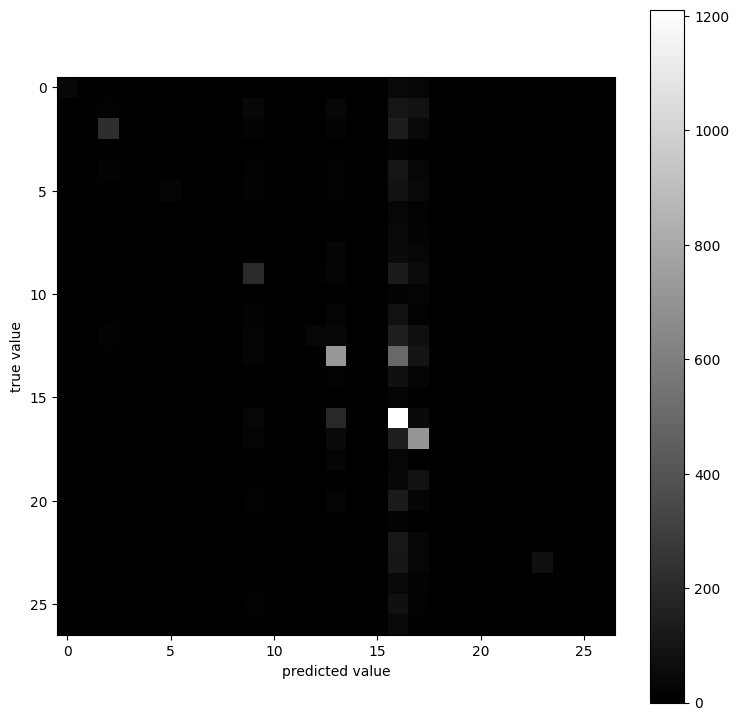

In [30]:
# Enable plotting directly within the notebook
%matplotlib inline

# Import the Bernoulli Naive Bayes classifier from scikit-learn
from sklearn.naive_bayes import BernoulliNB

# Initialize the classifier
nb = BernoulliNB()

# Train the classifier on the training data
nb.fit(X_train, y_train)

# Predict the labels of the test set
y_hat = nb.predict(X_test)

# Import necessary tools for evaluation
from sklearn import metrics
import matplotlib.pyplot as plt

# Define a function to plot the confusion matrix
def plot_confusion_matrix(y_pred, y):
    plt.imshow(metrics.confusion_matrix(y, y_pred), interpolation='nearest', cmap='gray')
    plt.colorbar()
    plt.ylabel('true value')
    plt.xlabel('predicted value')
    fig = plt.gcf()
    fig.set_size_inches(9, 9)

# Print the classification accuracy: the proportion of correctly predicted instances
print("classification accuracy:", metrics.accuracy_score(y_hat, y_test))

# Call the function to plot the confusion matrix for the test predictions
plot_confusion_matrix(y_hat, y_test)

# Print a detailed classification report showing precision, recall, f1-score, and support for each class
print("Classification Report:")
print(metrics.classification_report(y_hat, np.array(y_test)))

**QUESTION:** Identify the three most simple classes.
</div>

In [31]:
#Save data for future use.
import pickle
ofname = open('NYT_data.pkl', 'wb')
s = pickle.dump([X_train,y_train,X_test,y_test],ofname)
ofname.close()

In [32]:
N = 5
voc = vectorizer.get_feature_names_out()
for i, label in enumerate(np.unique(y)):
    topN = np.argsort(nb.feature_log_prob_[i])[-N:]
    print('Code: ' + str(label) + ' Terms: ' + str([voc[j] for j in topN]))


Code: 1 Terms: ['cut', 'bush', 'economy', 'budget', 'tax']
Code: 2 Terms: ['race', 'gay', 'new', 'court', 'abortion']
Code: 3 Terms: ['care', 'medicare', 'drug', 'health', 'new']
Code: 4 Terms: ['farm', 'safety', 'new', 'farmers', 'food']
Code: 5 Terms: ['workers', 'strike', 'union', 'immigrants', 'new']
Code: 6 Terms: ['students', 'city', 'new', 'school', 'schools']
Code: 7 Terms: ['rules', 'warming', 'air', 'new', 'pollution']
Code: 8 Terms: ['blackout', 'california', 'power', 'energy', 'oil']
Code: 10 Terms: ['new', 'security', '800', 'flight', 'crash']
Code: 12 Terms: ['drug', 'case', 'death', 'new', 'police']
Code: 13 Terms: ['plan', 'security', 'new', 'social', 'welfare']
Code: 14 Terms: ['city', 'homeless', 'york', 'rent', 'new']
Code: 15 Terms: ['new', 'billion', 'deal', 'enron', 'microsoft']
Code: 16 Terms: ['bush', 'challenged', 'war', 'iraq', 'nation']
Code: 17 Terms: ['space', 'nasa', 'loss', 'new', 'shuttle']
Code: 18 Terms: ['business', 'bush', 'clinton', 'china', 'trade'

Let us check what would happen if we enrich the data set with the summary of the article.

In [33]:
raw_data = data['Title']+data['Summary']
raw_train = raw_data[split]
raw_test = raw_data[np.logical_not(split)]
y = data['Topic_2digit']
y_train = y[split]
y_test = y[np.logical_not(split)]

In [34]:
# Let us tokenize the data
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(min_df=2, 
 stop_words='english', 
 strip_accents='unicode')

#example
test_string = raw_train[0]
print ("Example: " + test_string +"\n")
print ("Preprocessed: " + vectorizer.build_preprocessor()(test_string)+"\n")
print ("Tokenized:" + str(vectorizer.build_tokenizer()(test_string))+"\n")
print ("Analyzed data string:" + str(vectorizer.build_analyzer()(test_string))+"\n")


#Fit and convert data
X_train = vectorizer.fit_transform(raw_train)
X_test = vectorizer.transform(raw_test)

print ("\n")
print ("Number of tokens: " + str(len(vectorizer.get_feature_names_out())) +"\n")
print ("Extract of tokes:")
print( vectorizer.get_feature_names_out()[1000:1100])

Example: Nation's Smaller Jails Struggle To Cope With Surge in Inmates Jails overwhelmed with hardened criminals

Preprocessed: nation's smaller jails struggle to cope with surge in inmates jails overwhelmed with hardened criminals

Tokenized:['Nation', 'Smaller', 'Jails', 'Struggle', 'To', 'Cope', 'With', 'Surge', 'in', 'Inmates', 'Jails', 'overwhelmed', 'with', 'hardened', 'criminals']

Analyzed data string:['nation', 'smaller', 'jails', 'struggle', 'cope', 'surge', 'inmates', 'jails', 'overwhelmed', 'hardened', 'criminals']



Number of tokens: 11354

Extract of tokes:
['banned' 'banner' 'banning' 'bans' 'bansenate' 'banus' 'baptist'
 'baptists' 'bar' 'barak' 'barbie' 'bare' 'barely' 'bares' 'bargain'
 'bargaining' 'bargains' 'barnes' 'barney' 'baron' 'barons' 'barrage'
 'barred' 'barrel' 'barren' 'barrier' 'barriers' 'barring' 'bars' 'barter'
 'base' 'baseball' 'based' 'basement' 'bases' 'basespentagon' 'bashing'
 'basic' 'basis' 'baskeball' 'basketball' 'basks' 'basra' 'bastion' '

classification accuracy: 0.5155704697986577
Classification Report:
              precision    recall  f1-score   support

           1       0.45      0.61      0.52        83
           2       0.06      0.94      0.11        18
           3       0.69      0.59      0.63       514
           4       0.00      0.00      0.00         0
           5       0.03      0.67      0.06         9
           6       0.46      0.87      0.61       106
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
          10       0.01      0.50      0.02         2
          12       0.61      0.41      0.49       651
          13       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         0
          15       0.23      0.55      0.32       136
          16       0.70      0.64      0.67      1466
          17       0.06      1.00      0.11         8
          18       0.00      0.00      0.00         0
          19  

/Users/joaorochaemelo/code/IH/venv_ironhack/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/joaorochaemelo/code/IH/venv_ironhack/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/joaorochaemelo/code/IH/venv_ironhack/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, le

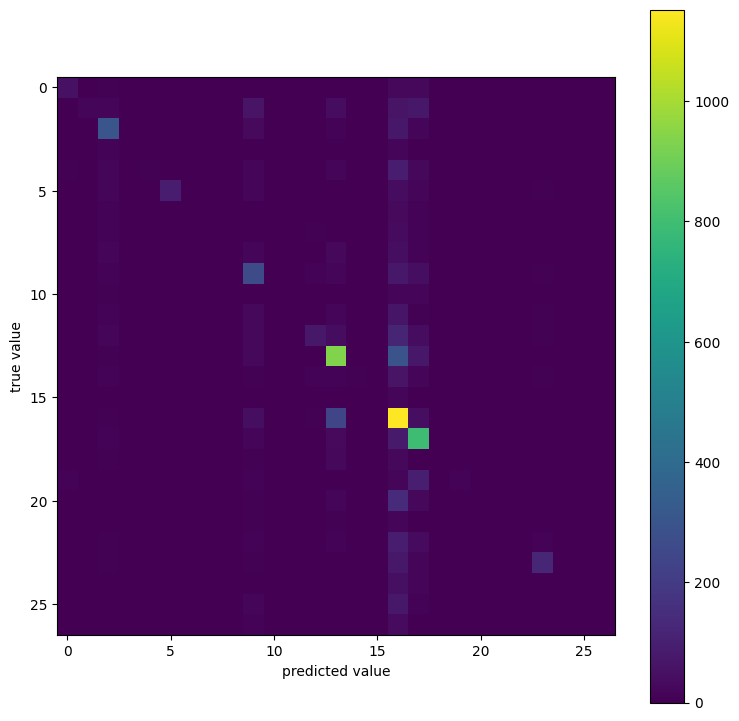

In [35]:
from sklearn.naive_bayes import BernoulliNB
nb = BernoulliNB()
nb.fit(X_train,y_train)

y_hat = nb.predict(X_test)
from sklearn import metrics
import matplotlib.pyplot as plt
def plot_confusion_matrix(y_pred, y):
    plt.imshow(metrics.confusion_matrix(y, y_pred), interpolation='nearest')
    plt.colorbar()
    plt.ylabel('true value')
    plt.xlabel('predicted value')
    fig = plt.gcf()
    fig.set_size_inches(9,9)    
    
print ("classification accuracy:", metrics.accuracy_score(y_hat, y_test))
plot_confusion_matrix(y_hat, y_test)
print ("Classification Report:")
print (metrics.classification_report(y_hat,np.array(y_test)))

In [36]:
#Save data for future use.
import pickle
ofname = open('NYT_context_data.pkl', 'wb')
s = pickle.dump([X_train,y_train,X_test,y_test],ofname)
ofname.close()

In [37]:
#What are the top N most predictive features per class?
N = 5
voc = vectorizer.get_feature_names_out()
for i, label in enumerate(np.unique(y)):
    topN = np.argsort(nb.feature_log_prob_[i])[-N:]
    print ('Code: '+ str(label) + ' Terms : '+ str([voc[i] for i in topN]))

Code: 1 Terms : ['cut', 'economy', 'market', 'budget', 'tax']
Code: 2 Terms : ['gay', 'race', 'new', 'court', 'abortion']
Code: 3 Terms : ['medicare', 'care', 'drug', 'new', 'health']
Code: 4 Terms : ['disease', 'farm', 'new', 'farmers', 'food']
Code: 5 Terms : ['new', 'workers', 'strike', 'union', 'immigrants']
Code: 6 Terms : ['education', 'students', 'new', 'schools', 'school']
Code: 7 Terms : ['water', 'pollution', 'new', 'global', 'warming']
Code: 8 Terms : ['gas', 'prices', 'energy', 'oil', 'power']
Code: 10 Terms : ['investigation', '800', 'twa', 'flight', 'crash']
Code: 12 Terms : ['death', 'scandal', 'abuse', 'new', 'police']
Code: 13 Terms : ['security', 'clinton', 'social', 'new', 'welfare']
Code: 14 Terms : ['housing', 'york', 'rent', 'nyc', 'new']
Code: 15 Terms : ['new', 'merger', 'scandal', 'antitrust', 'microsoft']
Code: 16 Terms : ['bush', 'challenged', 'war', 'nation', 'iraq']
Code: 17 Terms : ['loss', 'columbia', 'space', 'shuttle', 'new']
Code: 18 Terms : ['deal', '

Observe that adding the small summary improves the recognition rate by $10\%$. 

As a side note, Naive Bayes with these models creates a linear decision boundary. For this reason, sometimes NB is called a linear classifier.

## Support Vector Machines

![](https://upload.wikimedia.org/wikipedia/commons/thumb/7/72/SVM_margin.png/300px-SVM_margin.png)

Support Vector Machines (SVM) are a powerful method used in machine learning for classification tasks. They belong to a category of algorithms known as discriminative learning, where the goal is to find a decision boundary that separates different classes in the data.

#### What Makes SVM Special?

Unlike other linear models such as the perceptron or logistic regression, SVM offers a more robust approach to classification. Here's why:

- **Explicit Boundary Modeling**: SVM focuses on finding the best possible boundary (or hyperplane in higher dimensions) that separates the classes. This boundary is chosen not just to separate the classes but to do so in a way that maximizes the margin between the closest points of the classes to the boundary. These closest points are known as support vectors, giving the algorithm its name.

- **Versatility**: While the classical model for SVM is linear, it can be extended to handle non-linear classification using something called the kernel trick. This allows SVM to classify data that isn't linearly separable by transforming it into a higher-dimensional space where a linear separator does exist.

#### The Intuition Behind SVM

Imagine you're trying to draw a line that separates apples from oranges on a table. SVM aims to draw this line not just anywhere but in such a way that the smallest distance from the line to the nearest apple or orange is maximized. This ensures that the decision boundary is as far away from the closest points of each class as possible, providing a buffer that helps make the classification more robust to new data points.

- **Maximizing the Margin**: The key idea is to find the widest possible "street" (margin) between the classes, with the "edges" of this street just touching the nearest points of each class. These points at the edge are the support vectors.

- **Handling More Complex Data**: For data that can't be separated by a straight line, SVM uses the kernel trick to project the data into a higher-dimensional space where a linear separator is possible. This is like lifting the apples and oranges off the table into the air to find a plane that separates them.

#### Conclusion

SVM is a foundational tool in machine learning, known for its ability to create clear, well-defined boundaries between classes. Its ability to handle both linear and non-linear data makes it a versatile choice for a wide range of classification problems. Understanding the principles behind SVM allows for deeper insights into how machines can learn to distinguish between different categories of data, making it a crucial part of any machine learning toolkit.


[Link SVM](https://www.youtube.com/watch?v=efR1C6CvhmE&ab_channel=StatQuestwithJoshStarmer)

interactive(children=(FloatSlider(value=0.0, description='w0', max=10.0, min=-10.0), FloatSlider(value=0.0, de…

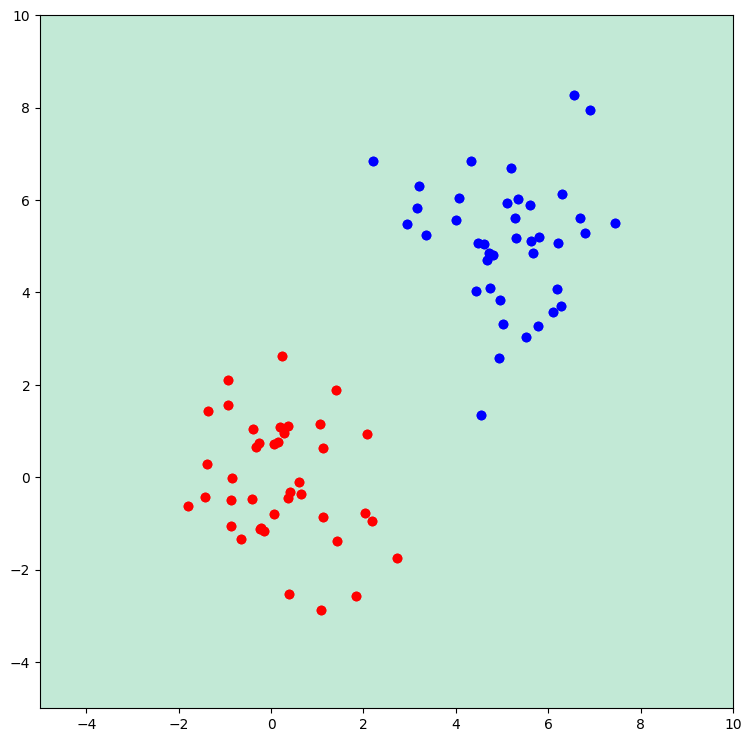

In [38]:
%matplotlib inline
%reset -f
import numpy as np
import matplotlib.pyplot as plt
#from IPython.html.widgets import interact
from ipywidgets import interact

class HLA():
    def __init__(self):
        np.random.seed(1)
        self.X = np.concatenate([1.25*np.random.randn(40,2),5+1.5*np.random.randn(40,2)]) 
        self.y = np.concatenate([np.ones((40,1)),-np.ones((40,1))])
        plt.scatter(self.X[0:40,0],self.X[0:40,1],color='r')
        plt.scatter(self.X[40:,0],self.X[40:,1],color='b') 
        delta = 0.025
        xx = np.arange(-5.0, 10.0, delta)
        yy = np.arange(-5.0, 10.0, delta)
        XX, YY = np.meshgrid(xx, yy)
        Xf = XX.flatten()
        Yf = YY.flatten()
        self.sz=XX.shape
        self.data = np.concatenate([Xf[:,np.newaxis],Yf[:,np.newaxis]],axis=1);

    def run(self,w0,w1,offset):
        w=np.array([w0,w1])
        w.shape=(2,1)
        Z = self.data.dot(w)+offset
        Z.shape=self.sz
        plt.scatter(self.X[0:40,0],self.X[0:40,1],color='r')
        plt.scatter(self.X[40:,0],self.X[40:,1],color='b')
        plt.imshow(Z, interpolation='bilinear', origin='lower', extent=(-5,10,-5,10),alpha=0.3, vmin=-30, vmax=30)
        XX = self.data[:,0].reshape(self.sz)
        YY = self.data[:,1].reshape(self.sz)
        plt.contour(XX,YY,Z,[0])
        fig = plt.gcf()
        fig.set_size_inches(9,9)
   

def decorator(w0,w1,offset):
    widget_hla.run(w0,w1,offset)
    
widget_hla = HLA()
interact(decorator, w0=(-10.,10.), w1=(-10.,10.), offset=(-20.,40.));

**QUESTION:** Using the former widget, check manually the following configurations:

* ${(w_0, w_1, \text{offset}) = (-1.7, -3.1, 10)}$
* ${(w_0, w_1, \text{offset}) = (-3.7, -0.5, 10.3)}$
* ${(w_0, w_1, \text{offset}) = (-7.5, -3.2, 28.8)}$

Which one of those configurations do you think yields a better boundary? Why?




**INTUITION:** The Support Vector Machine classifer finds the boundary with maximum distance/**margin** to both classes.</div>

Observations:
- It implicitly models the notion of noise. One expects that the boundary with maximum margin will be robust to small perturbations in the data.
- A maximum margin classifier has a unique solution in the separable case.

Let us check the result of fitting a SVM classifier using sklearn:

Number of support vectors: 3
(w0,w1) = [-7.58277576 -3.19765261]
offset = 28.697647407999817


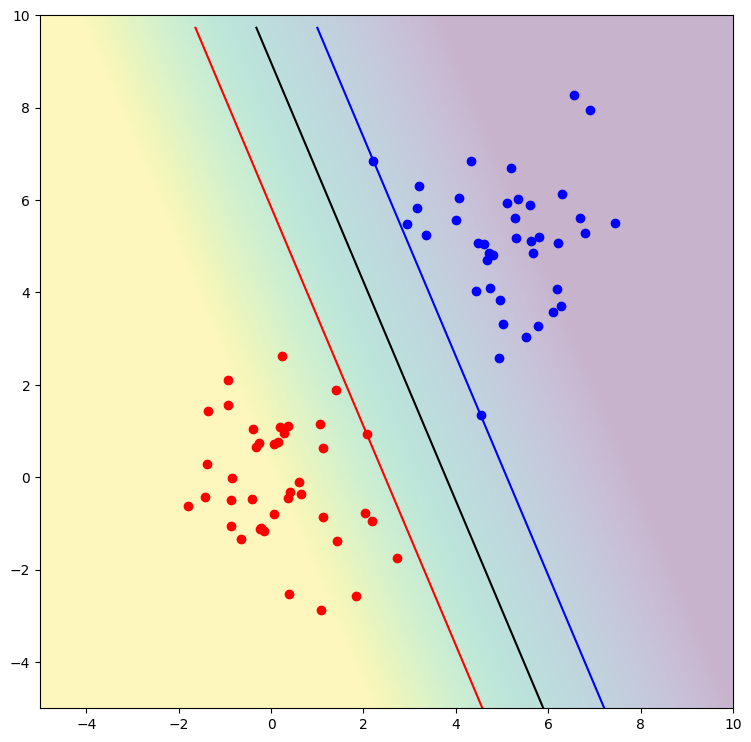

In [39]:
# Reset the global namespace in the notebook to start fresh
%reset -f

# Enable inline plotting for Jupyter notebooks
%matplotlib inline

# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm  # Import SVM model from scikit-learn

# Define a class for the SVM example
class svm_example():
    def __init__(self):
        '''Data creation: Generates synthetic data for classification'''
        np.random.seed(1)  # Set seed for reproducibility
        # Generate synthetic data: two clusters with normal distribution
        self.X = np.concatenate([1.25*np.random.randn(40,2), 5+1.5*np.random.randn(40,2)])
        # Generate labels: first 40 are 1, next 40 are -1
        self.y = np.concatenate([np.ones((40,1)), -np.ones((40,1))])

    def run(self):
        '''Fit a linear SVM: Train an SVM classifier with a linear kernel'''
        self.clf = svm.SVC(kernel='linear')  # Initialize the SVM with a linear kernel
        self.clf.fit(self.X, self.y.ravel())  # Fit the SVM model with the data
        
    def display(self):
        '''Display the decision boundary, margins, and support vectors'''
        # Create a mesh grid for plotting decision boundary
        delta = 0.25
        xx = np.arange(-5.0, 10.0, delta)
        yy = np.arange(-5.0, 10.0, delta)
        XX, YY = np.meshgrid(xx, yy)
        
        # Prepare the grid points for prediction
        Xf = XX.flatten()
        Yf = YY.flatten()
        sz = XX.shape
        data = np.concatenate([Xf[:, np.newaxis], Yf[:, np.newaxis]], axis=1)
        
        # Predict the decision function value for each grid point
        Z = self.clf.decision_function(data)
        Z.shape = sz
        
        # Plot the data points: red for one class, blue for the other
        plt.scatter(self.X[0:40, 0], self.X[0:40, 1], color='r')
        plt.scatter(self.X[40:, 0], self.X[40:, 1], color='b')
        
        # Display the decision boundary and margins
        plt.imshow(Z, interpolation='bilinear', origin='lower', extent=(-5,10,-5,10), alpha=0.3, vmin=-3, vmax=3)
        plt.contour(XX, YY, Z, [-1, 0, 1], colors=['b', 'k', 'r'])  # Draw the margins and decision boundary
        
        # Enhance the plot
        fig = plt.gcf()
        fig.set_size_inches(9, 9)
        
        # Print the number of support vectors for each class
        print('Number of support vectors: ' + str(np.sum(self.clf.n_support_)))
        
        # Highlight the support vectors on the plot
        plt.scatter(self.clf.support_vectors_[:, 0], 
                    self.clf.support_vectors_[:, 1], 
                    s=120, 
                    facecolors='none', 
                    linewidths=2,
                    zorder=10)
        
        # Print the coefficients of the decision function (w0, w1) and the offset
        print('(w0,w1) = ' + str(10*self.clf.coef_[0]))
        print('offset = ' + str(10*self.clf.intercept_[0]))
        
        # Return grid for further use if necessary
        return XX, YY, Z

# Create an instance of the svm_example class
c = svm_example()
c.run()  # Train the SVM model
XX, YY, Z = c.display()  # Display the results

Observe that there is a critical subset of data points. These are called **Support Vectors**. If any of those points disappear the boundary changes.  The decision boundary depends on the support vectors, thus we have to store them in our model.

Check the intuition in 3D:

interactive(children=(FloatSlider(value=45.0, description='elevation', max=90.0), IntSlider(value=180, descrip…

<function __main__.control3D(elevation, azimuth)>

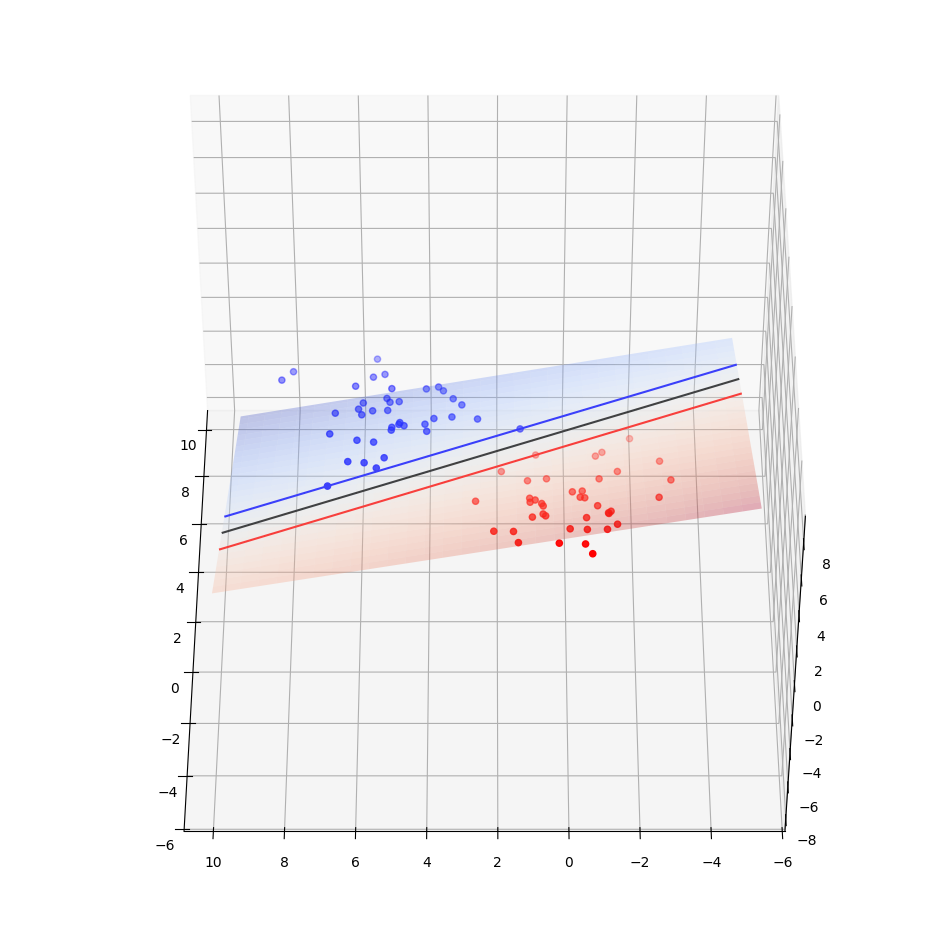

In [40]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from ipywidgets import interact

np.random.seed(1)
X = np.concatenate([1.25*np.random.randn(40,2),5+1.5*np.random.randn(40,2)]) 
y = np.concatenate([np.ones((40,1)),-np.ones((40,1))])
def control3D(elevation,azimuth):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    fig.set_size_inches(12,12)
    ax.plot_surface(XX,YY,Z,cmap=cm.coolwarm,alpha=0.3,linewidth=0)
    ax.scatter(X[0:40,0],X[0:40,1],1,color='r')
    ax.scatter(X[40:,0],X[40:,1],-1,color='b')
    ax.contour(XX,YY,Z,[-1,0,1],colors=['b','k','r'])
    ax.view_init(elev=elevation, azim=azimuth)

#Ipython 2.0
interact(control3D,elevation=(0.,90.),azimuth=(0,360))
#Ipython 1.1
#elevation = 45
#azimuth = 180
#control3D(elevation,azimuth)

**QUESTIONS:**
<li> Set the azimuth to $113$ and elevation to $0$. Observe the data points and the relative position of the hyperplane. 
<li> Change the elevation to $90$. Describe this projection.
</div>

#### 10.2.1 (Theory) Modeling the Support Vector Machine.

##### Geometry of the hyperplane
A hyperplane in ${\bf R}^d$ is defined as an affine combination of the variables: $\pi\equiv a^Tx + b = 0$. 

Features:

+ A hyperplane splits the space in two half-spaces. The evaluation of the equation of the hyperplane on any element of one of the half-space is a positive value. It is a negative value for all the elements in the other half-space.
+ The distance of a point $x \in{\bf R}^d$ to the hyperplane $\pi$ is 
$$d(x,\pi)=\frac{a^Tx+b}{\|a\|_2}$$

##### Modeling the separating hyperplane
Given a binary classification problem with training data $\mathcal{D}=\{(x_i,y_i)\},\; i=1\dots N, \; y_i\in\{+1,-1\} $. Consider $\mathcal{S} \subseteq \mathcal{D}$ the subset of all data points belonging to class $+1$, $\mathcal{S}=\{x_i | y_i=+1\}$, and $\mathcal{R}=\{x_i | y_i=-1\}$ its complement. 

Then the problem of finding a separating hyperplane consists of fulfilling the following constraints

$$a^Ts_i+b>0\; \text{and}\; a^Tr_i+b<0 \quad \forall s_i\in\mathcal{S}, r_i\in\mathcal{R}.$$

Note the strict inequalities in the formulation. Informally, we can consider the smallest satisfied constraint. And observe that the rest must be satisfied with a larger value. Thus, we can arbitrarily set that value to 1 and rewrite the problem as $$a^Ts_i+b\geq 1\; \text{and}\; a^Tr_i+b\leq -1.$$

This is a *feasibility problem* and it is usually written in the following way in optimization standard notation

$$
\begin{align}
\text{minimize} & 1\\
\text{subject to} & a^T r_i + b \leq -1,\; \forall r_i \in \mathcal{R}\\
& a^T s_i + b \geq 1\; \forall s_i \in \mathcal{S}
\end{align}
$$

or in a compact way

$$
\begin{align}
\text{minimize} & 1\\
\text{subject to} & y_i (a^T x_i + b) \geq 1,\; \forall x_i \in \mathcal{D}\\
\end{align}
$$

The solution of this problem is not unique, e.g. remember all the parameters of the 'Human Learning Algorithm'.  

##### The maximum margin hyperplane

Selecting the maximum margin hyperplane requires to add a new constraint to our problem. Remember from the geometry of the hyperplane that the distance of any point to a hyperplane is given by $d(x,\pi)=\frac{a^Tx+b}{\|a\|_2}$. 

Recall that we want positive data to be beyond value 1 and negative data below -1. Thus, what is the distance value we want to maximize?

The positive point closest to the boundary is at $1/\|a\|_2$ and the negative point closest to the boundary data point is also at $1/\|a\|_2$. Thus data points from different classes are at least $2/\|a\|_2$ apart. 

Recall that our goal is to find the separating hyperplane with maximum margin, i.e. with maximum distance among elements from different classes. Thus, we can complete the former formulation with our last requirement as follows

$$
\begin{align}
\text{maximize} & 2/\|a\|_2 \\
\text{subject to} & y_i (a^T x_i + b) \geq 1,\; \forall x_i \in \mathcal{D}\\
\end{align}
$$

or equivalently,

$$
\begin{align}
\text{minimize} & \|a\|_2/2 \\
\text{subject to} & y_i (a^T x_i + b) \geq 1,\; \forall x_i \in \mathcal{D}\\
\end{align}
$$

This formulation has a solution as long as the problem is linearly separable.

##### Dealing with the non-separable case

In order to deal with misclassifications, we are going to introduce a new set of variables $\xi_i$, that represents the amount of violation in the $i-th$ constraint. If the constraint is already satisfied, then $\xi_i=0$, and $\xi_i>0$ otherwise. Because $\xi_i$ is related to the errors, we would like to keep this amount as close so zero as possible. This makes us introduce a element in the objective trading-off with the maximum margin.

The new model becomes

$$
\begin{align}
\text{minimize} & \|a\|_2/2 + C \sum\limits_{i=1}^N \xi_i\\
\text{subject to} & y_i (a^T x_i + b) \geq 1 - \xi_i,\; i=1\dots N\\
& \xi_i\geq 0
\end{align}
$$

where $C$ is the trade-off parameter that roughly balances margin and misclassification rate. This formulation is also called **soft-margin SVM**.

**Take home ideas:**
<ul>
<li> Classical SVM fits a hyperplane separating boundary. </li>
<li> The hyperplane is defined to achieve the maximum margin. </li>
<li> If the problem is not linearly separable a new term related to the misclassification performance is introduced that trades-off with the margin. This trade-off is governed by parameter $C$ (or $\nu$ in $\nu$-SVM). </li>
</ul>
</div>

#### The New York Times problem again

Let us now apply our knowledge to the New York Times headlines topic prediction. 

In [41]:
# Recover NTY data
import pickle
from scipy import sparse
import numpy as np

# Load the data
with open('NYT_data.pkl', 'rb') as fname:
    data = pickle.load(fname)
X_train = data[0]
y_train = data[1]
X_test = data[2]
y_test = data[3]
print('Loading ok.')

# Ensure target arrays are properly formatted
y_train = np.array(y_train).ravel()
y_test = np.array(y_test).ravel()

# Train the model
from sklearn import svm
clf = svm.LinearSVC()
clf.fit(X_train, y_train)

Loading ok.


/Users/joaorochaemelo/code/IH/venv_ironhack/lib/python3.12/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


LinearSVC()

classification accuracy: 0.5318120805369128
Classification Report:
              precision    recall  f1-score   support

           1       0.65      0.43      0.52       173
           2       0.33      0.51      0.40       183
           3       0.65      0.65      0.65       440
           4       0.20      0.38      0.26        16
           5       0.48      0.47      0.47       187
           6       0.69      0.64      0.66       212
           7       0.38      0.33      0.35        63
           8       0.58      0.57      0.58        74
          10       0.44      0.42      0.43       132
          12       0.47      0.41      0.44       493
          13       0.49      0.44      0.46        48
          14       0.26      0.42      0.32        90
          15       0.26      0.31      0.29       277
          16       0.56      0.58      0.57      1290
          17       0.38      0.45      0.41       120
          18       0.32      0.24      0.28        33
          19  

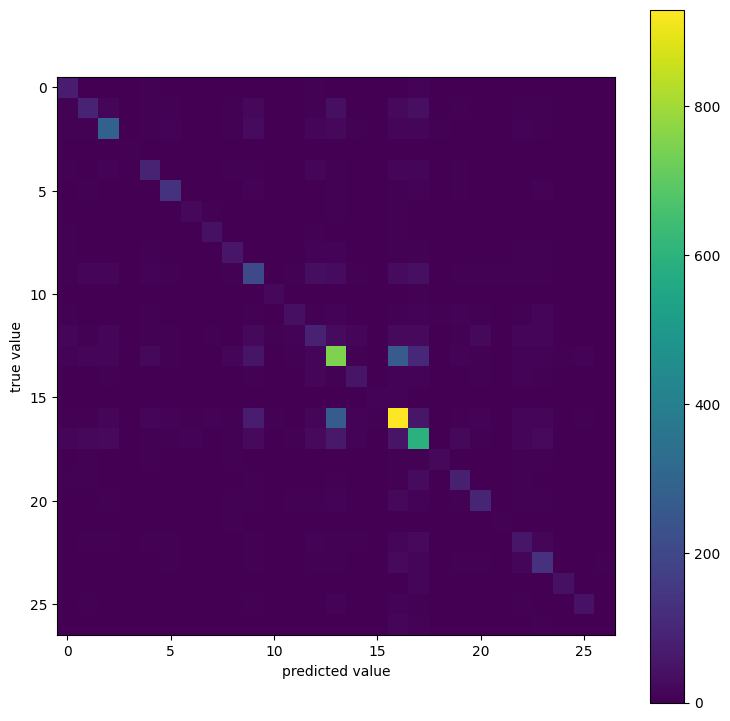

In [42]:
y_hat = clf.predict(X_test)
from sklearn import metrics
import matplotlib.pyplot as plt
def plot_confusion_matrix(y_pred, y):
    plt.imshow(metrics.confusion_matrix(y, y_pred), interpolation='nearest')
    plt.colorbar()
    plt.ylabel('true value')
    plt.xlabel('predicted value')
    fig = plt.gcf()
    fig.set_size_inches(9,9)    
    
print ("classification accuracy:", metrics.accuracy_score(y_hat, y_test))
plot_confusion_matrix(y_hat, y_test)
print ("Classification Report:")
print (metrics.classification_report(y_hat,np.array(y_test)))

Using the default parameters we can improve the recognition rate by $10\%$. However we can not check the most important words. Can we find a better trade-off?

In [43]:
# Importing necessary libraries for model selection
from sklearn import model_selection
from sklearn import svm

# Defining the parameter grid: 
# 'C' is a regularization parameter for LinearSVC. It controls the trade off between achieving a low training error and a 
# low testing error (generalization).
# A smaller 'C' value leads to a smoother decision boundary (less fitting to the training data), 
# while a larger 'C' encourages the model to classify all training examples correctly by giving the model more flexibility.
# Here, we're defining a range of 'C' values to try out with GridSearchCV to find the best one.
parameters = {'C': [0.01, 0.05, 0.1, 0.5, 1, 10]}

# Initializing the LinearSVC model
svc = svm.LinearSVC()

# Setting up GridSearchCV:
# 'svc' is the SVM model with a linear kernel to be trained.
# 'parameters' contains the grid of parameters ('C' values here) we want to try out.
# GridSearchCV will systematically work through the combinations of parameters (different 'C' values),
# train the model for each combination, and evaluate its performance.
clf = model_selection.GridSearchCV(svc, parameters)

# Fitting GridSearchCV:
# This will train the LinearSVC model multiple times with the different 'C' values specified in 'parameters'.
# For each 'C' value, it uses cross-validation to evaluate the model's performance.
# Cross-validation is a technique for assessing how the results of a statistical analysis will generalize to
# an independent data set.
# It does this by partitioning the original training data set into a training set to train the model,
# and a validation set to evaluate it. This process is repeated for each 'C' value.
clf.fit(X_train, y_train.ravel())

# After .fit() completes, clf (our GridSearchCV object) will contain a lot of information:
# - The best 'C' value found.
# - The model fitted with the best 'C' value.
# - The scores or performance metrics for each 'C' value tried.

/Users/joaorochaemelo/code/IH/venv_ironhack/lib/python3.12/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/joaorochaemelo/code/IH/venv_ironhack/lib/python3.12/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/joaorochaemelo/code/IH/venv_ironhack/lib/python3.12/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/joaorochaemelo/code/IH/venv_ironhack/lib/python3.12/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of 

GridSearchCV(estimator=LinearSVC(),
             param_grid={'C': [0.01, 0.05, 0.1, 0.5, 1, 10]})

/var/folders/sb/bdh1wr117yqfkv_bvrcwfxp80000gn/T/ipykernel_10022/2209456499.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([0.01, 0.05, 0.1, 0.5, 1, 10])


The best parameterization is {'C': 0.1}
The achieved score is 0.6021027654651043
Checking the rest of the scores 

[0.54049316 0.5961241  0.60210277 0.58391256 0.56919918 0.50915823]


[Text(-1.0, 0, '0.01'),
 Text(0.0, 0, '0.05'),
 Text(1.0, 0, '0.1'),
 Text(2.0, 0, '0.5'),
 Text(3.0, 0, '1'),
 Text(4.0, 0, '10'),
 Text(5.0, 0, ''),
 Text(6.0, 0, '')]

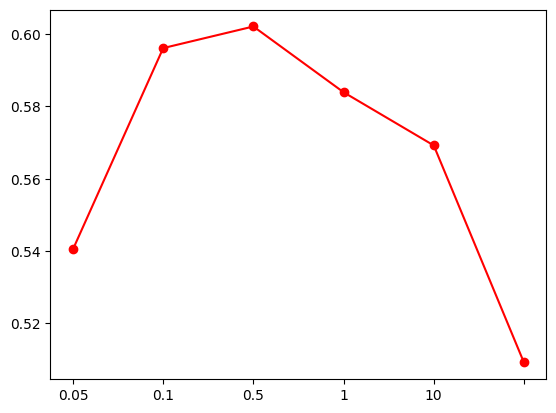

In [44]:
print ('The best parameterization is ' + str(clf.best_params_))
print ('The achieved score is ' + str(clf.best_score_))

print ('Checking the rest of the scores \n')
import matplotlib.pyplot as plt
print(clf.cv_results_['mean_test_score'])

plt.plot(clf.cv_results_['mean_test_score'],'r',marker='o')
ax = plt.gca()
ax.set_xticklabels([0.01, 0.05, 0.1, 0.5, 1, 10])    

## Understanding Best Parametrization and Achieved Score in GridSearchCV

When performing a grid search in machine learning using `GridSearchCV`, the goal is to find the best parameters for a model that result in the highest performance score. Here's what these terms mean:

### Best Parametrization

- **Best Parametrization**: This refers to the set of parameters that gave the best results after the grid search has been completed. In the context of an SVM with a `C` parameter, it indicates the value of `C` that led to the best model performance. For example, if `GridSearchCV` returns `{'C': 1}`, it means that using `C=1` for the SVM resulted in the most accurate predictions during the cross-validation process.

### Achieved Score

- **Achieved Score**: After finding the best parametrization, `GridSearchCV` also provides the best score that was achieved with this parameter. This score is a number that reflects how well the model with the best parameters is performing. The specific meaning of the score depends on the scoring method used (e.g., accuracy, precision, recall, F1 score). For instance, if the score is `0.60212765`, and we are using accuracy as our scoring metric, it indicates that the model with the best parameter (`C=1`) was able to correctly predict the class labels for approximately 60.21% of the cross-validated dataset.

### Putting It All Together

The process of using `GridSearchCV` not only helps in tuning the model to find the best settings but also gives us an estimate of how well the model is likely to perform on unseen data. It's important to look at both the best parameters and the achieved score to understand the potential effectiveness of your model.


classification accuracy: 0.5675167785234899
Classification Report:
              precision    recall  f1-score   support

           1       0.63      0.50      0.56       141
           2       0.31      0.57      0.40       152
           3       0.72      0.68      0.70       461
           4       0.20      0.43      0.27        14
           5       0.49      0.58      0.54       156
           6       0.73      0.69      0.71       210
           7       0.50      0.58      0.54        48
           8       0.67      0.70      0.68        69
          10       0.46      0.49      0.47       117
          12       0.50      0.42      0.46       527
          13       0.44      0.56      0.49        34
          14       0.24      0.57      0.34        61
          15       0.30      0.40      0.34       245
          16       0.61      0.59      0.60      1378
          17       0.45      0.54      0.49       118
          18       0.28      0.30      0.29        23
          19  

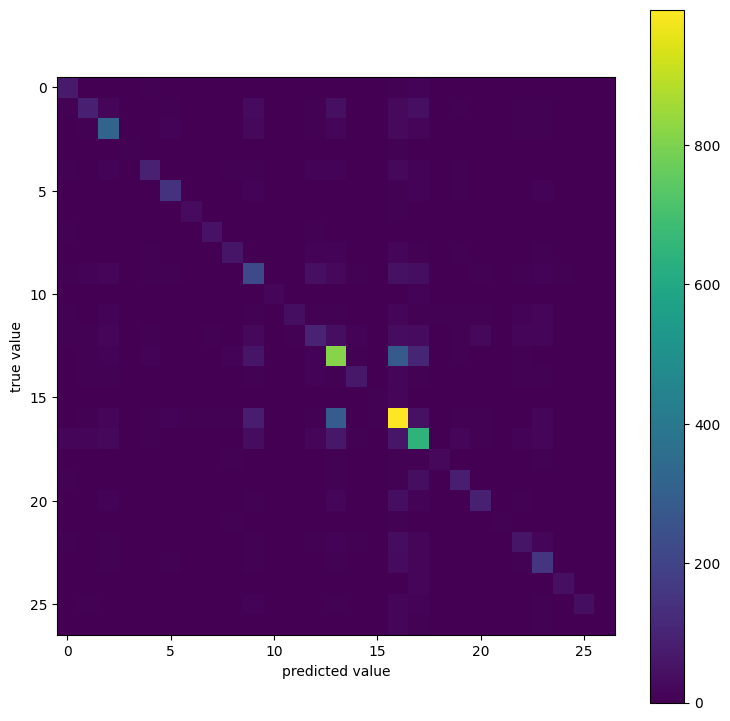

In [45]:
y_hat = clf.predict(X_test)
from sklearn import metrics
import matplotlib.pyplot as plt
def plot_confusion_matrix(y_pred, y):
    plt.imshow(metrics.confusion_matrix(y, y_pred), interpolation='nearest')
    plt.colorbar()
    plt.ylabel('true value')
    plt.xlabel('predicted value')
    fig = plt.gcf()
    fig.set_size_inches(9,9)    
    
print ("classification accuracy:", metrics.accuracy_score(y_hat, np.array(y_test)))
plot_confusion_matrix(y_hat, np.array(y_test))
print ("Classification Report:")
print (metrics.classification_report(y_hat,np.array(y_test)))

# FULL SCOPE EXERCISE

## Load Data

In [46]:
# Supervised Learning Class

from sklearn.datasets import load_breast_cancer
import pandas as pd

cancer = load_breast_cancer()
print("cancer.keys(): \n{}".format(cancer.keys()))
print(cancer['target_names'])

data = pd.DataFrame(cancer['data'], columns = cancer['feature_names'])
target = pd.DataFrame(cancer['target'], columns = ['target'])
data.head()

cancer.keys(): 
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
['malignant' 'benign']


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## Hyperparameter and choices:

In [47]:
# Feature Selection?
# Non-transformed vs Standardization?
# Tune the parameters of the models

## Split in Train and Test

In [48]:
# Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(cancer['data'], cancer['target'], random_state=0)

## Feature Selection

In [49]:
# Feature Selection
import seaborn as sns
#display(pd.DataFrame(X_train, columns = data.columns).corr())

features = pd.DataFrame(X_train, columns = data.columns)
target = pd.Series(y_train)
corr_dict = {}
cols_to_remove = []

for col in list(features.columns):
  corr_dict[col] = abs(features[col].corr(target))
  if corr_dict[col] < 0.5:
    cols_to_remove.append(col)

#corr_dict
cols_to_remove

['mean texture',
 'mean smoothness',
 'mean symmetry',
 'mean fractal dimension',
 'texture error',
 'smoothness error',
 'compactness error',
 'concavity error',
 'concave points error',
 'symmetry error',
 'fractal dimension error',
 'worst texture',
 'worst smoothness',
 'worst symmetry',
 'worst fractal dimension']

In [50]:
# Create "Feature Selected sets"
X_train, X_test, y_train, y_test = train_test_split(cancer['data'], 
                                                    cancer['target'], 
                                                    random_state=0)

c_data = pd.DataFrame(cancer['data'], columns = cancer['feature_names'])
c_data = c_data.drop(cols_to_remove, axis=1)

X_train_featsel, X_test_featsel, y_train, y_test = train_test_split(c_data, 
                                                                    cancer['target'],
                                                                    random_state=0)

## Standardization

In [51]:
# Standardiztion
from sklearn.preprocessing import StandardScaler

##### X_train #########
# create standardization object
scale = StandardScaler().fit(features)

X_train_standard = scale.transform(X_train)
X_test_standard  = scale.transform(X_test)          

X_train_standard = pd.DataFrame(X_train_standard, columns = features.columns)
X_test_standard = pd.DataFrame(X_test_standard, columns = features.columns)

##### X_train_featsel #########
# create standardization object
scale = StandardScaler().fit(features)

X_train_featsel_standard = scale.transform(X_train)
X_test_featsel_standard = scale.transform(X_test)

X_train_featsel_standard = pd.DataFrame(X_train_featsel_standard, columns = features.columns)
X_test_featsel_standard = pd.DataFrame(X_test_featsel_standard, columns = features.columns)




# Standardization
from sklearn.preprocessing import StandardScaler

##### X_train #########
# create standardization object
scale = StandardScaler().fit(features)

X_train_standard = scale.transform(X_train)
X_train_standard = pd.DataFrame(X_train_standard, columns = features.columns)

X_test_standard  = scale.transform(X_test)
X_test_standard = pd.DataFrame(X_test_standard, columns = features.columns)

##### X_train_featsel #########
# create standardization object
features_featsel = pd.DataFrame(X_train_featsel, columns = c_data.columns)
scale = StandardScaler().fit(features_featsel)

X_train_featsel_standard = scale.transform(X_train_featsel)
X_train_featsel_standard = pd.DataFrame(X_train_featsel_standard, columns = c_data.columns)

X_test_featsel_standard = scale.transform(X_test_featsel)
X_test_featsel_standard = pd.DataFrame(X_test_featsel_standard, columns = c_data.columns)

/Users/joaorochaemelo/code/IH/venv_ironhack/lib/python3.12/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Users/joaorochaemelo/code/IH/venv_ironhack/lib/python3.12/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Users/joaorochaemelo/code/IH/venv_ironhack/lib/python3.12/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Users/joaorochaemelo/code/IH/venv_ironhack/lib/python3.12/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Users/joaorochaemelo/code/IH/venv_ironhack/lib/python3.12/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but StandardScal

## Model Selection

In [52]:
# Model Selection
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_validate

import warnings
warnings.filterwarnings('ignore')

def model_picker(model_name, parameter):
  if model_name == 'KNN':
    return KNeighborsClassifier(n_neighbors = parameter)
  if model_name == 'SVM':
    return LinearSVC(C = parameter)
  else:
    raise ValueError("I dont know this model")

model_selection = []
cv_acc_list = []

train_data_dict = {'normal':X_train, 
              'featsel':X_train_featsel,
              'standard': X_train_standard,
              'featsel_standard': X_train_featsel_standard}

model_list = ['KNN', 'SVM']
model_para = {'KNN':[1,3,5,7,9], 'SVM':[0.001, 0.01, 0.1, 1, 10]}

for train_data_type in ['normal', 'featsel', 'standard', 'featsel_standard']:
  train_data = train_data_dict[train_data_type]
  print(train_data_type)
  for model_name in model_list:
    for p in model_para[model_name]:
      #print(p)
      model = model_picker(model_name, p) 
      model.fit(train_data, y_train)

      cv_acc = cross_validate(model,train_data, y_train, cv = 10)['test_score'].mean()
      #print(train_data_type, model_name, p, cv_acc)
      model_selection.append([train_data_type, model_name, str(p), cv_acc])
      cv_acc_list.append(cv_acc)

print(max(cv_acc_list))
print(min(cv_acc_list))

print('\n')
display(model_selection)
print('\n')
for best in model_selection:
  #print(best)
  if best[3] == max(cv_acc_list):
    print('the best model is: ', best)

normal
featsel
standard
featsel_standard
0.9790143964562569
0.8663344407530454




[['normal', 'KNN', '1', 0.9179955703211518],
 ['normal', 'KNN', '3', 0.9180509413067552],
 ['normal', 'KNN', '5', 0.92718715393134],
 ['normal', 'KNN', '7', 0.9272978959025471],
 ['normal', 'KNN', '9', 0.9272425249169436],
 ['normal', 'SVM', '0.001', 0.9130121816168328],
 ['normal', 'SVM', '0.01', 0.8895902547065339],
 ['normal', 'SVM', '0.1', 0.9038205980066445],
 ['normal', 'SVM', '1', 0.9086378737541528],
 ['normal', 'SVM', '10', 0.8663344407530454],
 ['featsel', 'KNN', '1', 0.9084717607973423],
 ['featsel', 'KNN', '3', 0.9109634551495016],
 ['featsel', 'KNN', '5', 0.9224806201550388],
 ['featsel', 'KNN', '7', 0.929623477297896],
 ['featsel', 'KNN', '9', 0.9272425249169436],
 ['featsel', 'SVM', '0.001', 0.9084163898117387],
 ['featsel', 'SVM', '0.01', 0.9039313399778516],
 ['featsel', 'SVM', '0.1', 0.9012181616832781],
 ['featsel', 'SVM', '1', 0.8941306755260244],
 ['featsel', 'SVM', '10', 0.8663344407530454],
 ['standard', 'KNN', '1', nan],
 ['standard', 'KNN', '3', nan],
 ['standa



the best model is:  ['standard', 'SVM', '0.1', 0.9790143964562569]


In [53]:
## Test your model
model = model_picker('SVM', 0.01)
model.fit(X_train_standard, y_train)
model.score(X_test_standard, y_test)

0.972027972027972

## How do I "share"/use what I just did?

In [54]:
# Supervised Learning Class

from sklearn.datasets import load_breast_cancer
import pandas as pd

cancer = load_breast_cancer()
print("cancer.keys(): \n{}".format(cancer.keys()))
print(cancer['target_names'])

data = pd.DataFrame(cancer['data'], columns = cancer['feature_names'])
target = pd.DataFrame(cancer['target'], columns = ['target'])
data.head()

cols_to_remove = ['mean texture', 
                'mean smoothness', 
                'mean symmetry', 
                'mean fractal dimension', 
                'texture error', 
                'smoothness error', 
                'compactness error', 
                'concavity error', 
                'concave points error', 
                'symmetry error', 
                'fractal dimension error', 
                'worst texture', 
                'worst smoothness', 
                'worst symmetry', 
                'worst fractal dimension']

def model_picker(model_name, parameter):
  if model_name == 'KNN':
    return KNeighborsClassifier(n_neighbors = parameter)
  if model_name == 'SVM':
    return LinearSVC(C = parameter)
  else:
    raise ValueError("I dont know this model")

cancer.keys(): 
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
['malignant' 'benign']


In [55]:
# We need to:
features = pd.DataFrame(cancer['data'], columns = data.columns)
target = pd.Series(cancer['target'])

# Save the preprocessing steps (feature selection and standardization):
print(f'The columns to remove are {cols_to_remove}')

# Drop the un-selected columns
features = features.drop(cols_to_remove, axis=1)

# Rebuild the Scaler with all the data
scale = StandardScaler().fit(features)
print(f'The Standardizer we should use is: {scale}')

# Save the model (save the trained model with adjusted internal parameters in a file)
#model = model_picker('SVM', 0.01)
model = LinearSVC(C = 0.01)

features = pd.DataFrame(scale.transform(features) , columns = features.columns) # Normalize the features before training the model
model.fit(features, target)
print('The model we should use is: ', model)
# When using this we need to load the aforementioned elements

######################################
## SAVE THIS FUNCTION IN A .py FILE ##
import pandas as pd
import pickle
from sklearn.preprocessing import StandardScaler

def pre_processing(features):

  # Feature Selection
  cols_to_remove = ['mean texture', 
                  'mean smoothness', 
                  'mean symmetry', 
                  'mean fractal dimension', 
                  'texture error', 
                  'smoothness error', 
                  'compactness error', 
                  'concavity error', 
                  'concave points error', 
                  'symmetry error', 
                  'fractal dimension error', 
                  'worst texture', 
                  'worst smoothness', 
                  'worst symmetry', 
                  'worst fractal dimension']
  
  features = features.drop(cols_to_remove, axis=1)

  # Feature Scaling
  scale = pickle.load(open('Scaler_for_cancer.sav', 'rb'))
  return pd.DataFrame(scale.transform(features) , columns = features.columns)

######################################

The columns to remove are ['mean texture', 'mean smoothness', 'mean symmetry', 'mean fractal dimension', 'texture error', 'smoothness error', 'compactness error', 'concavity error', 'concave points error', 'symmetry error', 'fractal dimension error', 'worst texture', 'worst smoothness', 'worst symmetry', 'worst fractal dimension']
The Standardizer we should use is: StandardScaler()
The model we should use is:  LinearSVC(C=0.01)


In [56]:
import pickle

# save the Standardizer to disk
filename = 'Scaler_for_cancer.sav'
pickle.dump(scale, open(filename, 'wb'))

# save the model to disk
filename = 'Model_for_cancer.sav'
pickle.dump(model, open(filename, 'wb'))

And with this, you have all the elements you need to run this again: the model, the scaler and the preprocessing code